In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import os
import scipy.io
from scipy.io import loadmat, savemat
from scipy.stats import gaussian_kde
import chaospy as cp
import numpoly
import seaborn as sns

Pointwise Convergence of Bandgap Properties Study

In [93]:
folder_root = r'E:\Research\Projects\UQ 2D Metamaterials\resolution scaling output variance study'
bg_size_10p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_10x10.mat'))['bg_size']
bg_size_10p = float(bg_size_10p)
bg_size_20p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_20x20.mat'))['bg_size']
bg_size_20p = float(bg_size_20p)
bg_size_30p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_30x30.mat'))['bg_size']
bg_size_30p = float(bg_size_30p)
bg_size_40p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_40x40.mat'))['bg_size']
bg_size_40p = float(bg_size_40p)
bg_size_50p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_50x50.mat'))['bg_size']
bg_size_50p = float(bg_size_50p)
bg_size_60p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_60x60.mat'))['bg_size']
bg_size_60p = float(bg_size_60p)
bg_size_70p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_70x70.mat'))['bg_size']
bg_size_70p = float(bg_size_70p)
bg_size_80p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_80x80.mat'))['bg_size']
bg_size_80p = float(bg_size_80p)
bg_size_90p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_90x90.mat'))['bg_size']
bg_size_90p = float(bg_size_90p)
bg_size_100p = loadmat(os.path.join(folder_root, 'bg_size_uniform_default_100x100.mat'))['bg_size']
bg_size_100p = float(bg_size_100p)
bg_sizes = np.array([bg_size_10p, bg_size_20p, bg_size_30p, bg_size_40p, bg_size_50p, bg_size_60p, bg_size_70p, bg_size_80p, bg_size_90p, bg_size_100p])
print(bg_sizes)

[1464.76284676 1399.10267468 1384.97483147 1379.44072259 1376.60773841
 1374.9445992  1373.87152931 1373.13186909 1372.59644412 1372.19397465]


In [94]:
bg_top_10p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_10x10.mat'))['bg_top']
bg_top_10p = float(bg_top_10p)
bg_top_20p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_20x20.mat'))['bg_top']
bg_top_20p = float(bg_top_20p)
bg_top_30p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_30x30.mat'))['bg_top']
bg_top_30p = float(bg_top_30p)
bg_top_40p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_40x40.mat'))['bg_top']
bg_top_40p = float(bg_top_40p)
bg_top_50p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_50x50.mat'))['bg_top']
bg_top_50p = float(bg_top_50p)
bg_top_60p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_60x60.mat'))['bg_top']
bg_top_60p = float(bg_top_60p)
bg_top_70p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_70x70.mat'))['bg_top']
bg_top_70p = float(bg_top_70p)
bg_top_80p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_80x80.mat'))['bg_top']
bg_top_80p = float(bg_top_80p)
bg_top_90p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_90x90.mat'))['bg_top']
bg_top_90p = float(bg_top_90p)
bg_top_100p = loadmat(os.path.join(folder_root, 'bg_top_uniform_default_100x100.mat'))['bg_top']
bg_top_100p = float(bg_top_100p)
bg_tops = np.array([bg_top_10p, bg_top_20p, bg_top_30p, bg_top_40p, bg_top_50p, bg_top_60p, bg_top_70p, bg_top_80p, bg_top_90p, bg_top_100p])
print(bg_tops)

[2635.41277912 2554.99450755 2536.34090556 2528.69197521 2524.65647776
 2522.22644528 2520.62577626 2519.5030904  2518.67818653 2518.04999572]


In [95]:
bg_bottom_10p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_10x10.mat'))['bg_bottom']
bg_bottom_10p = float(bg_bottom_10p)
bg_bottom_20p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_20x20.mat'))['bg_bottom']
bg_bottom_20p = float(bg_bottom_20p)
bg_bottom_30p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_30x30.mat'))['bg_bottom']
bg_bottom_30p = float(bg_bottom_30p)
bg_bottom_40p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_40x40.mat'))['bg_bottom']
bg_bottom_40p = float(bg_bottom_40p)
bg_bottom_50p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_50x50.mat'))['bg_bottom']
bg_bottom_50p = float(bg_bottom_50p)
bg_bottom_60p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_60x60.mat'))['bg_bottom']
bg_bottom_60p = float(bg_bottom_60p)
bg_bottom_70p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_70x70.mat'))['bg_bottom']
bg_bottom_70p = float(bg_bottom_70p)
bg_bottom_80p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_80x80.mat'))['bg_bottom']
bg_bottom_80p = float(bg_bottom_80p)
bg_bottom_90p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_90x90.mat'))['bg_bottom']
bg_bottom_90p = float(bg_bottom_90p)
bg_bottom_100p = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_default_100x100.mat'))['bg_bottom']
bg_bottom_100p = float(bg_bottom_100p)
bg_bottoms = np.array([bg_bottom_10p, bg_bottom_20p, bg_bottom_30p, bg_bottom_40p, bg_bottom_50p, bg_bottom_60p, bg_bottom_70p, bg_bottom_80p, bg_bottom_90p, bg_bottom_100p])
print(bg_bottoms)

[1170.64993236 1155.89183287 1151.36607409 1149.25125262 1148.04873935
 1147.28184608 1146.75424695 1146.37122131 1146.08174241 1145.85602108]


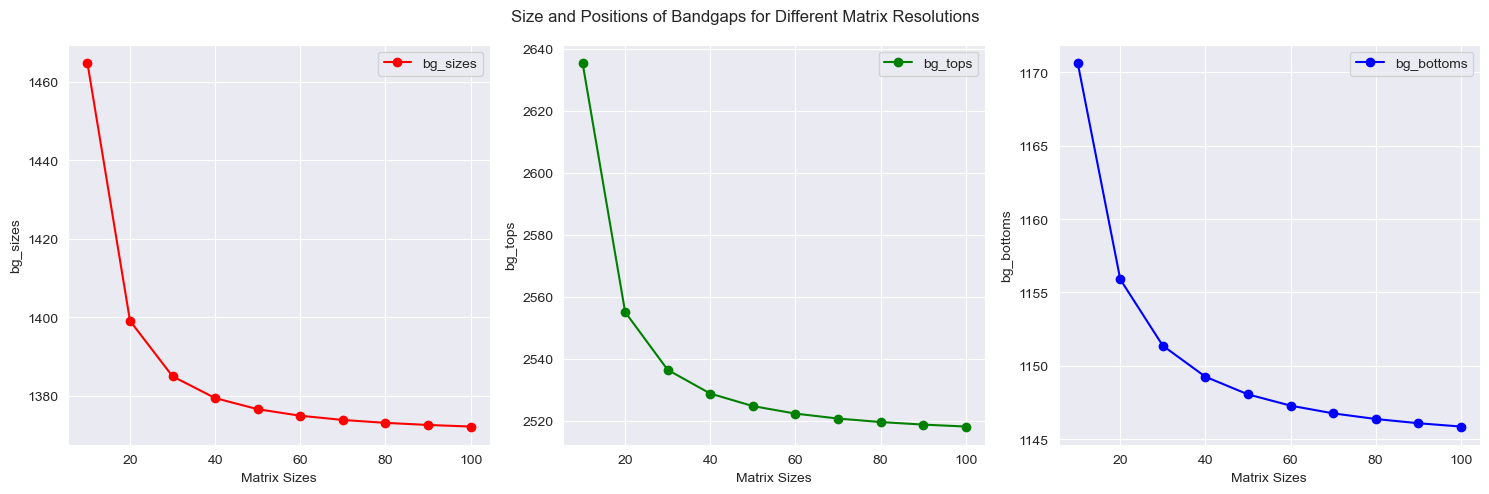

In [97]:
matrix_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Creating a 3-figure subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting bg_sizes against matrix_sizes in the first subplot
axes[0].plot(matrix_sizes, bg_sizes, marker='o', label='bg_sizes', color='red')
axes[0].set_xlabel('Matrix Sizes')
axes[0].set_ylabel('bg_sizes')
axes[0].legend()

# Plotting bg_tops against matrix_sizes in the second subplot
axes[1].plot(matrix_sizes, bg_tops, marker='o', label='bg_tops', color='green')
axes[1].set_xlabel('Matrix Sizes')
axes[1].set_ylabel('bg_tops')
axes[1].legend()

# Plotting bg_bottoms against matrix_sizes in the third subplot
axes[2].plot(matrix_sizes, bg_bottoms, marker='o', label='bg_bottoms', color='blue')
axes[2].set_xlabel('Matrix Sizes')
axes[2].set_ylabel('bg_bottoms')
axes[2].legend()

fig.suptitle('Size and Positions of Bandgaps for Different Matrix Resolutions')
plt.tight_layout()
plt.show()


Compute Times Study

In [38]:
compute_time_10p = loadmat(os.path.join(folder_root, 'elapsed_time_default_10x10.mat'))['elapsedTime']
compute_time_10p = float(compute_time_10p)
compute_time_20p = loadmat(os.path.join(folder_root, 'elapsed_time_default_20x20.mat'))['elapsedTime']
compute_time_20p = float(compute_time_20p)
compute_time_30p = loadmat(os.path.join(folder_root, 'elapsed_time_default_30x30.mat'))['elapsedTime']
compute_time_30p = float(compute_time_30p)
compute_time_40p = loadmat(os.path.join(folder_root, 'elapsed_time_default_40x40.mat'))['elapsedTime']
compute_time_40p = float(compute_time_40p)
compute_time_50p = loadmat(os.path.join(folder_root, 'elapsed_time_default_50x50.mat'))['elapsedTime']
compute_time_50p = float(compute_time_50p)
compute_time_60p = loadmat(os.path.join(folder_root, 'elapsed_time_default_60x60.mat'))['elapsedTime']
compute_time_60p = float(compute_time_60p)
compute_time_70p = loadmat(os.path.join(folder_root, 'elapsed_time_default_70x70.mat'))['elapsedTime']
compute_time_70p = float(compute_time_70p)
compute_time_80p = loadmat(os.path.join(folder_root, 'elapsed_time_default_80x80.mat'))['elapsedTime']
compute_time_80p = float(compute_time_80p)
compute_time_90p = loadmat(os.path.join(folder_root, 'elapsed_time_default_90x90.mat'))['elapsedTime']
compute_time_90p = float(compute_time_90p)
compute_time_100p = loadmat(os.path.join(folder_root, 'elapsed_time_default_100x100.mat'))['elapsedTime']
compute_time_100p = float(compute_time_100p)
compute_times = np.array([compute_time_10p, compute_time_20p, compute_time_30p, compute_time_40p, compute_time_50p, compute_time_60p, compute_time_70p, compute_time_80p, compute_time_90p, compute_time_100p])
print(compute_times)

[  0.9839949   4.3871368   8.9672237  14.9380217  27.9205207  36.4241914
  57.8860935  64.8468288  95.0752999 106.6839978]


Text(0.5, 1.0, 'Matrix Compute Times as a Function of Matrix Resolution')

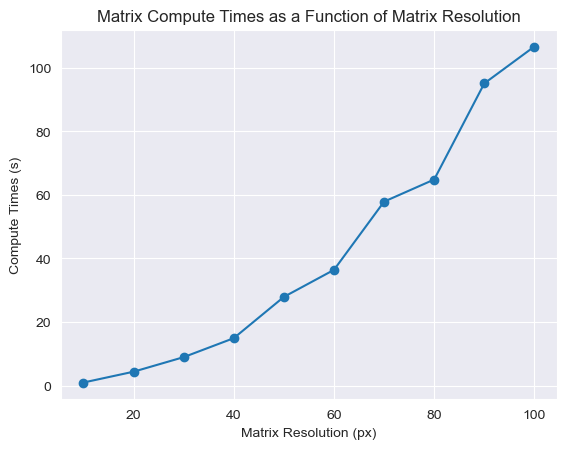

In [40]:
plt.figure()
plt.plot(matrix_sizes, compute_times, marker='o', label='compute_times')
plt.xlabel('Matrix Resolution (px)')
plt.ylabel('Compute Times (s)')
plt.title('Matrix Compute Times as a Function of Matrix Resolution')

Probabilistic Convergence of Bandgap Properties Study

In [84]:
#Chance of mutation on edge pixels: 5%
#both materials counted for edge detection: True
folder_root = r'E:\Research\Projects\UQ 2D Metamaterials\geometry_defect_effect_asymtote_study'
#bg_size_10p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_10p_5%_n100.mat'))['bg_size']
bg_bottom_10p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_10p_5%_n100.mat'))['bg_bottom']
bg_top_10p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_10p_5%_n100.mat'))['bg_top']
bg_center_10p_n100 = (bg_top_10p_n100 + bg_bottom_10p_n100)/2
bg_size_10p_n100 = bg_top_10p_n100 - bg_bottom_10p_n100

#bg_size_20p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_20p_5%_n100.mat'))['bg_size']
bg_bottom_20p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_20p_5%_n100.mat'))['bg_bottom']
bg_top_20p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_20p_5%_n100.mat'))['bg_top']
bg_center_20p_n100 = (bg_top_20p_n100 + bg_bottom_20p_n100)/2
bg_size_20p_n100 = bg_top_20p_n100 - bg_bottom_20p_n100

#bg_size_30p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_30p_5%_n100.mat'))['bg_size']
bg_bottom_30p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_30p_5%_n100.mat'))['bg_bottom']
bg_top_30p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_30p_5%_n100.mat'))['bg_top']
bg_center_30p_n100 = (bg_top_30p_n100 + bg_bottom_30p_n100)/2
bg_size_30p_n100 = bg_top_30p_n100 - bg_bottom_30p_n100

#bg_size_40p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_40p_5%_n100.mat'))['bg_size']
bg_bottom_40p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_40p_5%_n100.mat'))['bg_bottom']
bg_top_40p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_40p_5%_n100.mat'))['bg_top']
bg_center_40p_n100 = (bg_top_40p_n100 + bg_bottom_40p_n100)/2
bg_size_40p_n100 = bg_top_40p_n100 - bg_bottom_40p_n100

#bg_size_50p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_50p_5%_n100.mat'))['bg_size']
bg_bottom_50p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_50p_5%_n100.mat'))['bg_bottom']
bg_top_50p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_50p_5%_n100.mat'))['bg_top']
bg_center_50p_n100 = (bg_top_50p_n100 + bg_bottom_50p_n100)/2
bg_size_50p_n100 = bg_top_50p_n100 - bg_bottom_50p_n100

#bg_size_60p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_60p_5%_n100.mat'))['bg_size']
bg_bottom_60p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_60p_5%_n100.mat'))['bg_bottom']
bg_top_60p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_60p_5%_n100.mat'))['bg_top']
bg_center_60p_n100 = (bg_top_60p_n100 + bg_bottom_60p_n100)/2
bg_size_60p_n100 = bg_top_60p_n100 - bg_bottom_60p_n100

#bg_size_70p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_70p_5%_n100.mat'))['bg_size']
bg_bottom_70p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_70p_5%_n100.mat'))['bg_bottom']
bg_top_70p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_70p_5%_n100.mat'))['bg_top']
bg_center_70p_n100 = (bg_top_70p_n100 + bg_bottom_70p_n100)/2
bg_size_70p_n100 = bg_top_70p_n100 - bg_bottom_70p_n100

#bg_size_80p_n100 = loadmat(os.path.join(folder_root, 'bg_size_uniform_80p_5%_n100.mat'))['bg_size']
bg_bottom_80p_n100 = loadmat(os.path.join(folder_root, 'bg_bottom_uniform_80p_5%_n100.mat'))['bg_bottom']
bg_top_80p_n100 = loadmat(os.path.join(folder_root, 'bg_top_uniform_80p_5%_n100.mat'))['bg_top']
bg_center_80p_n100 = (bg_top_80p_n100 - bg_bottom_80p_n100)/2
bg_size_80p_n100 = bg_top_80p_n100 - bg_bottom_80p_n100

keys = ['10p', '20p', '30p', '40p', '50p', '60p', '70p', '80p']
bg_sizes_n100 =  dict(zip(keys, [bg_size_10p_n100, bg_size_20p_n100, bg_size_30p_n100, bg_size_40p_n100, bg_size_50p_n100, bg_size_60p_n100, bg_size_70p_n100, bg_size_80p_n100]))
bg_bottoms_n100 = dict(zip(keys, [bg_bottom_10p_n100, bg_bottom_20p_n100, bg_bottom_30p_n100, bg_bottom_40p_n100, bg_bottom_50p_n100, bg_bottom_60p_n100, bg_bottom_70p_n100, bg_bottom_80p_n100]))
bg_tops_n100 = dict(zip(keys, [bg_top_10p_n100, bg_top_20p_n100, bg_top_30p_n100, bg_top_40p_n100, bg_top_50p_n100, bg_top_60p_n100, bg_top_70p_n100, bg_top_80p_n100]))
bg_centers_n100 = dict(zip(keys, [bg_center_10p_n100, bg_center_20p_n100, bg_center_30p_n100, bg_center_40p_n100, bg_center_50p_n100, bg_center_60p_n100, bg_center_70p_n100, bg_center_80p_n100]))

#print(len(bg_centers_n100))
print('bandgap center for arbitrary resolution matrix')
print(bg_centers_n100['10p'])
print('variance of above array ' + str(np.var(bg_centers_n100['10p'])))
print('\n')
print('bandgap bottom for arbitrary resolution matrix')
print(bg_bottoms_n100['10p'])
print('variance of above array ' + str(np.var(bg_bottoms_n100['10p'])))
print('\n')
print('bandgap top for arbitrary resolution matrix')
print(bg_tops_n100['10p'])
print('variance of above array ' + str(np.var(bg_tops_n100['10p'])))
print('\n')
print('bandgap size for arbitrary resolution matrix')
print(bg_sizes_n100['10p'])
print('variance of above array ' + str(np.var(bg_sizes_n100['10p'])))

bandgap center for arbitrary resolution matrix
[[1903.03135672 2779.22723769 1943.52764611 1903.22579628 1914.77670303
  1903.03135672 1851.07020951 1870.01555362 1899.99431709 2021.38917193
  1902.95860133 1569.48718357 1887.08132387 1968.79805435 2026.56397091
  1932.71018933 1848.20289142 2003.69807786 2021.01271322 1940.94638383
  1956.59435458 1991.26610243 2071.39525616 1954.04595543 1903.0878566
  1921.19712035 2018.61826255 2061.34095403 1429.89222328 1900.51881993
  1975.5948161  1899.12653517 2112.18527402 1899.52872368 1967.0266508
  1929.90196202 1966.71014651 1968.65711187 1869.94363644 2011.08035151
  1846.57253192 1939.37632242 1790.25254499 1565.76626766 1967.09665268
  1903.24054529 1912.70303683 1969.3094222  1933.2847517  1961.94846989
  1931.82740071 1994.14463527 1912.70303683 1941.86396938 1905.91559096
  1895.65955189 1919.26296254 1852.93500872 1966.90812958 1988.78168433
  1790.65879859 1969.71485728 1703.65365141 1967.63257599 1944.54822987
  1903.16333967 205

Text(0.5, 0.98, "Histograms of 100 MC Samples' Computed Bandgap Size \nand Center Locations for Different Resolutions (10-40 px)")

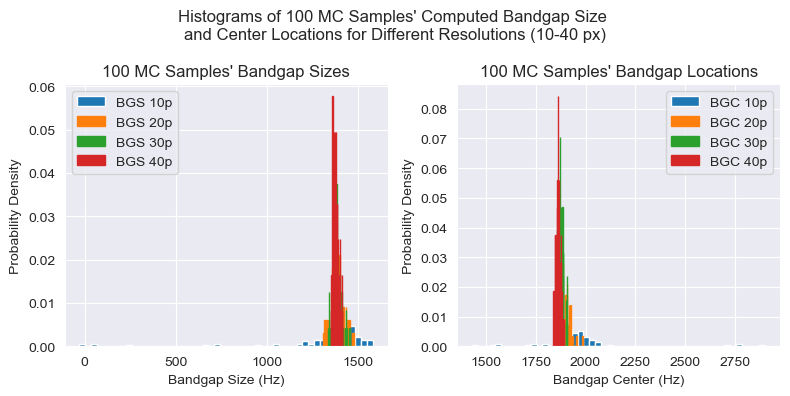

In [134]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, tight_layout=True, figsize=(8,4))
# for i in range(8):
#     axs[0].hist(bg_sizes_n100[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGS'+str(str(10*(i+1))+'p'))
#     axs[1].hist(bg_centers_n100[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGC'+str(str(10*(i+1))+'p'))
axs[0].hist(bg_sizes_n100['10p'].flatten(), bins=50, density=True, alpha=1, color='C0', label='BGS 10p')
axs[1].hist(bg_centers_n100['10p'].flatten(), bins=50, density=True, alpha=1, color='C0', label='BGC 10p')
axs[0].hist(bg_sizes_n100['20p'].flatten(), bins=50, density=True, alpha=1, color='C1', edgecolor='C1', label='BGS 20p')
axs[1].hist(bg_centers_n100['20p'].flatten(), bins=50, density=True, alpha=1, color='C1', edgecolor='C1', label='BGC 20p')
axs[0].hist(bg_sizes_n100['30p'].flatten(), bins=50, density=True, alpha=1, color='C2', edgecolor='C2', label='BGS 30p')
axs[1].hist(bg_centers_n100['30p'].flatten(), bins=50, density=True, alpha=1, color='C2', edgecolor='C2', label='BGC 30p')
axs[0].hist(bg_sizes_n100['40p'].flatten(), bins=50, density=True, alpha=1, color='C3', edgecolor='C3', label='BGS 40p')
axs[1].hist(bg_centers_n100['40p'].flatten(), bins=50, density=True, alpha=1, color='C3', edgecolor='C3',label='BGC 40p')

axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples\' Bandgap Sizes')

axs[1].set_xlabel("Bandgap Center (Hz)")
axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('100 MC Samples\' Bandgap Locations')

title_str = 'Histograms of 100 MC Samples\' Computed Bandgap Size \nand Center Locations for Different Resolutions (10-40 px)'
plt.suptitle(title_str)

Text(0.5, 0.98, "Histograms of 100 MC Samples' Computed Bandgap Size \nand Center Locations for Different Resolutions (40-70 px)")

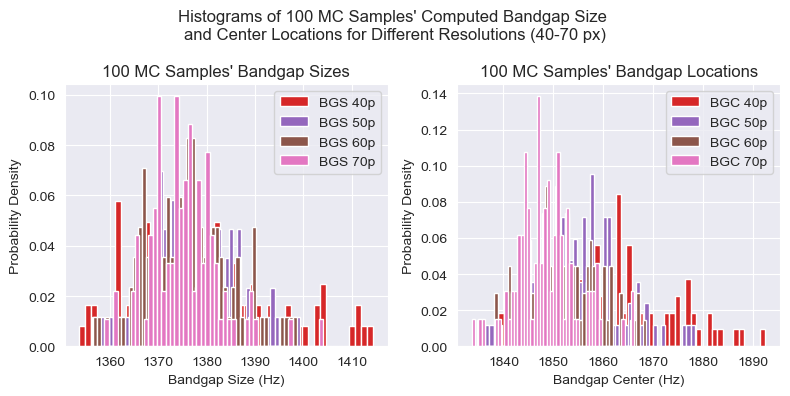

In [131]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, tight_layout=True, figsize=(8,4))
# for i in range(8):
#     axs[0].hist(bg_sizes_n100[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGS'+str(str(10*(i+1))+'p'))
#     axs[1].hist(bg_centers_n100[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGC'+str(str(10*(i+1))+'p'))
axs[0].hist(bg_sizes_n100['40p'].flatten(), bins=50, density=True, alpha=1, color='C3', label='BGS 40p')
axs[1].hist(bg_centers_n100['40p'].flatten(), bins=50, density=True, alpha=1, color='C3', label='BGC 40p')
axs[0].hist(bg_sizes_n100['50p'].flatten(), bins=50, density=True, alpha=1, color='C4', label='BGS 50p')
axs[1].hist(bg_centers_n100['50p'].flatten(), bins=50, density=True, alpha=1, color='C4', label='BGC 50p')
axs[0].hist(bg_sizes_n100['60p'].flatten(), bins=50, density=True, alpha=1, color='C5', label='BGS 60p')
axs[1].hist(bg_centers_n100['60p'].flatten(), bins=50, density=True, alpha=1, color='C5', label='BGC 60p')
axs[0].hist(bg_sizes_n100['70p'].flatten(), bins=50, density=True, alpha=1, color='C6', label='BGS 70p')
axs[1].hist(bg_centers_n100['70p'].flatten(), bins=50, density=True, alpha=1, color='C6', label='BGC 70p')

axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples\' Bandgap Sizes')

axs[1].set_xlabel("Bandgap Center (Hz)")
axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('100 MC Samples\' Bandgap Locations')

title_str = 'Histograms of 100 MC Samples\' Computed Bandgap Size \nand Center Locations for Different Resolutions (40-70 px)'
plt.suptitle(title_str)

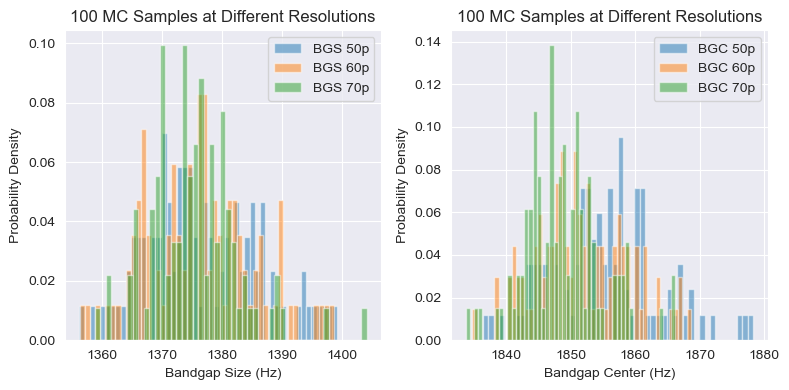

In [91]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, tight_layout=True, figsize=(8,4))
# for i in range(8):
#     axs[0].hist(bg_sizes_n100[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGS'+str(str(10*(i+1))+'p'))
#     axs[1].hist(bg_centers_n100[str(10*(i+1))+'p'], bins=50, density=True, alpha=0.5, label='BGC'+str(str(10*(i+1))+'p'))
axs[0].hist(bg_sizes_n100['50p'].flatten(), bins=50, density=True, alpha=0.5, label='BGS 50p')
axs[1].hist(bg_centers_n100['50p'].flatten(), bins=50, density=True, alpha=0.5, label='BGC 50p')
axs[0].hist(bg_sizes_n100['60p'].flatten(), bins=50, density=True, alpha=0.5, label='BGS 60p')
axs[1].hist(bg_centers_n100['60p'].flatten(), bins=50, density=True, alpha=0.5, label='BGC 60p')
axs[0].hist(bg_sizes_n100['70p'].flatten(), bins=50, density=True, alpha=0.5, label='BGS 70p')
axs[1].hist(bg_centers_n100['70p'].flatten(), bins=50, density=True, alpha=0.5, label='BGC 70p')

axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples at Different Resolutions')

axs[1].set_xlabel("Bandgap Center (Hz)")
axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('100 MC Samples at Different Resolutions')

title_str = 'Histograms of 100 MC Samples Computed Bandgap Size and Center Locations\n for Different Resolutions (10-80 px)'

Text(0.5, 0.98, 'Histograms of 100 MC Samples Computed Bandgap Size and Center Locations\n for Different Resolutions (10-80 px)')

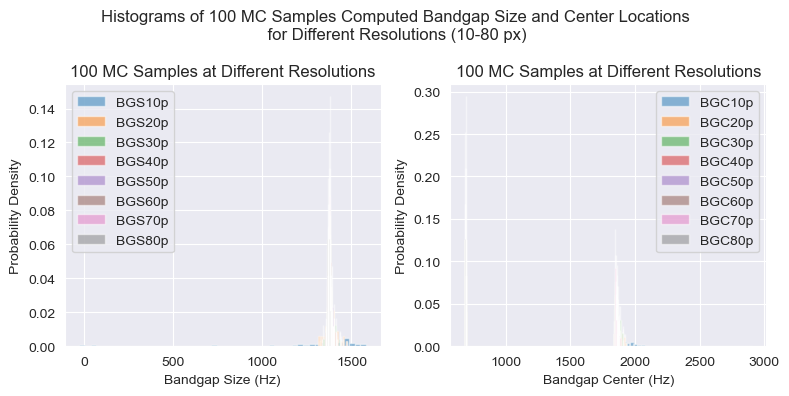

In [86]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, tight_layout=True, figsize=(8,4))
for i in range(8):
    axs[0].hist(bg_sizes_n100[str(10*(i+1))+'p'].flatten(), bins=50, density=True, alpha=0.5, label='BGS'+str(str(10*(i+1))+'p'))
    axs[1].hist(bg_centers_n100[str(10*(i+1))+'p'].flatten(), bins=50, density=True, alpha=0.5, label='BGC'+str(str(10*(i+1))+'p'))

axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples at Different Resolutions')

axs[1].set_xlabel("Bandgap Center (Hz)")
axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('100 MC Samples at Different Resolutions')

title_str = 'Histograms of 100 MC Samples Computed Bandgap Size and Center Locations\n for Different Resolutions (10-80 px)'
fig.suptitle(title_str)

### OBSOLETE CODE BELOW ###

In [ ]:
### GENERATE INPUT DISTRIBUTIONS ###
np.random.seed(1)

E_s_mean = 200e6
E_s_range = 100e6
E_h_mean = 200e9
E_h_range = 100e9

rho_s_mean = 1e3
rho_s_range = 5e2
rho_h_mean = 8e3
rho_h_range = 4e3

pr_h_mean = 0.25
pr_h_range = 0.25
pr_s_mean = 0.25
pr_s_range = 0.25

E_soft_dist = cp.Uniform(E_s_mean-E_s_range, E_s_mean+E_s_range)
E_hard_dist = cp.Uniform(E_h_mean-E_h_range, E_h_mean+E_h_range)
rho_soft_dist = cp.Uniform(rho_s_mean-rho_s_range, rho_s_mean+rho_s_range)
rho_hard_dist = cp.Uniform(rho_h_mean-rho_h_range, rho_h_mean+rho_h_range)
pr_soft_dist = cp.Uniform(pr_s_mean-pr_s_range, pr_s_mean+pr_s_range)
pr_hard_dist = cp.Uniform(pr_h_mean-pr_h_range, pr_h_mean+pr_h_range)
joint_dist = cp.J(E_soft_dist, E_hard_dist, rho_soft_dist, rho_hard_dist, pr_soft_dist, pr_hard_dist)

In [ ]:
degrees = [2, 3, 4, 5]
quadrature_surrogates = {}
quadrature_nodes = {}
quadrature_weights = {}
for d in degrees:
    nodes, weights = cp.generate_quadrature(d, joint_dist, rule='G')
    #nodes, weights = cp.quadrature.legendre(order=d, lower=E_soft_dist.lower, upper=E_soft_dist.upper)
    quadrature_nodes[d] = nodes
    quadrature_weights[d] = weights

#quadrature_nodes

for qd in quadrature_nodes:
    savemat('joint_dist_pd_'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_nodes[qd]})

In [ ]:
E_soft_sample_sets = {}
E_hard_sample_sets = {}
rho_soft_sample_sets = {}
rho_hard_sample_sets = {}
pr_soft_sample_sets = {}
pr_hard_sample_sets = {}
bg_size_sample_sets = {}
bg_top_sample_sets = {}
bg_bottom_sample_sets = {}
bg_center_sample_sets = {}

for d in degrees:
    folder_name = 'quad_6i_pd'+str(d)
    file_suffix = '_q_pd'+str(d)+'_uniform_'+str((d+1)**6)+'.mat'
    E_soft_file = loadmat(folder_name+'/E_soft'+file_suffix)
    E_hard_file = loadmat(folder_name+'/E_hard'+file_suffix)
    rho_soft_file = loadmat(folder_name+'/rho_soft'+file_suffix)
    rho_hard_file = loadmat(folder_name+'/rho_hard'+file_suffix)
    pr_soft_file = loadmat(folder_name+'/pr_soft'+file_suffix)
    pr_hard_file = loadmat(folder_name+'/pr_hard'+file_suffix)
    bg_size_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    E_soft_sample_sets[d] = E_soft_file['E_soft'][:]
    E_hard_sample_sets[d] = E_hard_file['E_hard'][:]
    rho_soft_sample_sets[d] = rho_soft_file['rho_soft'][:]
    rho_hard_sample_sets[d] = rho_hard_file['rho_hard'][:]
    pr_soft_sample_sets[d] = pr_soft_file['poisson_soft'][:]
    pr_hard_sample_sets[d] = pr_hard_file['poisson_hard'][:]
    bg_size_sample_sets[d] = bg_size_file['bg_size'][:]
    bg_top_sample_sets[d] = bg_top_file['bg_top'][:]
    bg_bottom_sample_sets[d] = bg_bottom_file['bg_bottom'][:]
    bg_center_sample_sets[d] = (bg_top_sample_sets[d]+bg_bottom_sample_sets[d])/2

#bg_size_sample_sets

In [ ]:
E_soft_MC_sets = {}
E_hard_MC_sets = {}
rho_soft_MC_sets = {}
rho_hard_MC_sets = {}
pr_soft_MC_sets = {}
pr_hard_MC_sets = {}
bg_size_MC_sets = {}
bg_top_MC_sets = {}
bg_bottom_MC_sets = {}
bg_center_MC_sets = {}

set_N = [100, 1000, 10000]
for N in set_N:
    folder_name = 'mc_'+str(N)
    file_suffix = '_mc_uniform_'+str(N)+'.mat'
    E_soft_file = loadmat(folder_name+'/E_soft'+file_suffix)
    E_hard_file = loadmat(folder_name+'/E_hard'+file_suffix)
    rho_soft_file = loadmat(folder_name+'/rho_soft'+file_suffix)
    rho_hard_file = loadmat(folder_name+'/rho_hard'+file_suffix)
    pr_soft_file = loadmat(folder_name+'/pr_soft'+file_suffix)
    pr_hard_file = loadmat(folder_name+'/pr_hard'+file_suffix)
    bg_size_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    E_soft_MC_sets[N] = E_soft_file['E_soft'][:]
    E_hard_MC_sets[N] = E_hard_file['E_hard'][:]
    rho_soft_MC_sets[N] = rho_soft_file['rho_soft'][:]
    rho_hard_MC_sets[N] = rho_hard_file['rho_hard'][:]
    pr_soft_MC_sets[N] = pr_soft_file['poisson_soft'][:]
    pr_hard_MC_sets[N] = pr_hard_file['poisson_hard'][:]
    bg_size_MC_sets[N] = bg_size_file['bg_size'][:]
    bg_top_MC_sets[N] = bg_top_file['bg_top'][:]
    bg_bottom_MC_sets[N] = bg_bottom_file['bg_bottom'][:]
    bg_center_MC_sets[N] = (bg_top_MC_sets[N] + bg_bottom_MC_sets[N])/2

In [ ]:
print(type(bg_center_sample_sets))
print(len(bg_center_sample_sets[2]))

print(type(bg_center_MC_sets))
print(len(bg_center_MC_sets[10000]))
# fig = plt.figure()
# plt.scatter(E_soft_sample_sets[2], bg_size_sample_sets[2])
# plt.title('Black Box Model Evaluations on 2th order quadrature samples')
# plt.xlabel('E_soft')
# plt.ylabel('bg_size')

In [ ]:
### GENERATE MONTE CARLO INPUT SAMPLES ###
N_MC2 = 100
N_MC3 = 1000
N_MC4 = 10000

joint_samples_MC2 = joint_dist.sample(N_MC2)
joint_samples_MC3 = joint_dist.sample(N_MC3)
joint_samples_MC4 = joint_dist.sample(N_MC4)

savemat('joint_dist_mc_'+str(N_MC2)+'.mat',{'mc_'+str(N_MC2)+'_inputs':joint_samples_MC2})
savemat('joint_dist_mc_'+str(N_MC3)+'.mat',{'mc_'+str(N_MC3)+'_inputs':joint_samples_MC3})
savemat('joint_dist_mc_'+str(N_MC4)+'.mat',{'mc_'+str(N_MC4)+'_inputs':joint_samples_MC4})

Quadrature fits on bandgap size

In [ ]:
### FIT SURROGATE MODELS - QUADRATURE RULE ###
q_surrogates = {}
for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_nodes[degree],
        weights=quadrature_weights[degree],
        solves=bg_size_sample_sets[degree]
    )
    q_surrogates[degree] = polynomial_approximation

In [ ]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test = 1000
joint_test = joint_dist.sample(N_test)
print(joint_test.shape)
#print(joint_test[0])
surrogate_outputs = {}
surrogate_kdes = {}
surrogate_pdf = {}
for degree in degrees:
    surrogate_model = q_surrogates[degree]
    #print(type(surrogate_model))
    #print(surrogate_model)
    #surrogate_outputs[degree] = surrogate_model.__call__(joint_test).astype(float)
    surrogate_outputs[degree] = surrogate_model(
        q0=joint_test[0,:], q1=joint_test[1,:],
        q2=joint_test[2,:], q3=joint_test[3,:],
        q4=joint_test[4,:], q5=joint_test[5,:])
    #print(surrogate_outputs[degree])
    surrogate_kdes[degree] = gaussian_kde(surrogate_outputs[degree])
    surrogate_pdf[degree] = surrogate_kdes[degree](np.linspace(np.min(surrogate_outputs[degree]), np.max(surrogate_outputs[degree]), 1000))

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5)

for d in degrees:
    plot_label = 'PD='+str(d)+', N='+str((d+1)**6)
    axs[0].scatter(np.linspace(np.min(surrogate_outputs[d]), np.max(surrogate_outputs[d]), 1000), surrogate_pdf[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(surrogate_outputs[d]), np.max(surrogate_outputs[d]), 1000), surrogate_pdf[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(surrogate_outputs[d]), np.max(surrogate_outputs[d]), 1000), surrogate_pdf[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('Quadrature Fits Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('Quadrature Fits Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('Quadrature Fits Overlaid on 10000 MC Samples')

title_str = 'Bandgap Size Output PDFs From Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation \nSurrogate Models of Orders 2 to 5 Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Quadrature fits on bandgap top

In [ ]:
### FIT SURROGATE MODELS - QUADRATURE RULE - BANDGAP TOP ###
q_surrogates_bgt = {}
for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_nodes[degree],
        weights=quadrature_weights[degree],
        solves=bg_top_sample_sets[degree]
    )
    q_surrogates_bgt[degree] = polynomial_approximation

In [ ]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_bgt = 1000
joint_test_bgt = joint_dist.sample(N_test_bgt)
print(joint_test_bgt.shape)
#print(joint_test_bgt[0])
surrogate_outputs_bgt = {}
surrogate_kdes_bgt = {}
surrogate_pdf_bgt = {}
for degree in degrees:
    surrogate_model = q_surrogates_bgt[degree]
    #print(type(surrogate_model))
    #print(surrogate_model)
    #surrogate_outputs_bgt[degree] = surrogate_model.__call__(joint_test_bgt).astype(float)
    surrogate_outputs_bgt[degree] = surrogate_model(
        q0=joint_test_bgt[0,:], q1=joint_test_bgt[1,:],
        q2=joint_test_bgt[2,:], q3=joint_test_bgt[3,:],
        q4=joint_test_bgt[4,:], q5=joint_test_bgt[5,:])
    #print(surrogate_outputs_bgt[degree])
    surrogate_kdes_bgt[degree] = gaussian_kde(surrogate_outputs_bgt[degree])
    surrogate_pdf_bgt[degree] = surrogate_kdes_bgt[degree](np.linspace(np.min(surrogate_outputs_bgt[degree]), np.max(surrogate_outputs_bgt[degree]), 1000))

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5)

for d in degrees:
    plot_label = 'PD='+str(d)+', N='+str((d+1)**6)
    axs[0].scatter(np.linspace(np.min(surrogate_outputs_bgt[d]), np.max(surrogate_outputs_bgt[d]), 1000), surrogate_pdf_bgt[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(surrogate_outputs_bgt[d]), np.max(surrogate_outputs_bgt[d]), 1000), surrogate_pdf_bgt[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(surrogate_outputs_bgt[d]), np.max(surrogate_outputs_bgt[d]), 1000), surrogate_pdf_bgt[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('Quadrature Fits Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('Quadrature Fits Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('Quadrature Fits Overlaid on 10000 MC Samples')

title_str = 'Bandgap Top Output PDFs From Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation \nSurrogate Models of Orders 2 to 5 Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Quadrature fits on bandgap bottom

In [ ]:
### FIT SURROGATE MODELS - QUADRATURE RULE - BANDGAP BOTTOM ###
q_surrogates_bgb = {}
for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_nodes[degree],
        weights=quadrature_weights[degree],
        solves=bg_bottom_sample_sets[degree]
    )
    q_surrogates_bgb[degree] = polynomial_approximation

In [ ]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_bgb = 1000
joint_test_bgb = joint_dist.sample(N_test_bgb)
print(joint_test_bgb.shape)
#print(joint_test_bgb[0])
surrogate_outputs_bgb = {}
surrogate_kdes_bgb = {}
surrogate_pdf_bgb = {}
for degree in degrees:
    surrogate_model = q_surrogates_bgb[degree]
    #print(type(surrogate_model))
    #print(surrogate_model)
    #surrogate_outputs_bgb[degree] = surrogate_model.__call__(joint_test_bgb).astype(float)
    surrogate_outputs_bgb[degree] = surrogate_model(
        q0=joint_test_bgb[0,:], q1=joint_test_bgb[1,:],
        q2=joint_test_bgb[2,:], q3=joint_test_bgb[3,:],
        q4=joint_test_bgb[4,:], q5=joint_test_bgb[5,:])
    #print(surrogate_outputs_bgb[degree])
    surrogate_kdes_bgb[degree] = gaussian_kde(surrogate_outputs_bgb[degree])
    surrogate_pdf_bgb[degree] = surrogate_kdes_bgb[degree](np.linspace(np.min(surrogate_outputs_bgb[degree]), np.max(surrogate_outputs_bgb[degree]), 1000))

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5)

for d in degrees:
    plot_label = 'PD='+str(d)+', N='+str((d+1)**6)
    axs[0].scatter(np.linspace(np.min(surrogate_outputs_bgb[d]), np.max(surrogate_outputs_bgb[d]), 1000), surrogate_pdf_bgb[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(surrogate_outputs_bgb[d]), np.max(surrogate_outputs_bgb[d]), 1000), surrogate_pdf_bgb[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(surrogate_outputs_bgb[d]), np.max(surrogate_outputs_bgb[d]), 1000), surrogate_pdf_bgb[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('Quadrature Fits Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('Quadrature Fits Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('Quadrature Fits Overlaid on 10000 MC Samples')

title_str = 'Bandgap Bottom Output PDFs From Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation \nSurrogate Models of Orders 2 to 5 Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Quadrature fits on bandgap center

In [ ]:
### FIT SURROGATE MODELS - QUADRATURE RULE - BANDGAP CENTER ###

In [ ]:
q_surrogates_bgc = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_nodes[degree],
        weights=quadrature_weights[degree],
        solves=bg_center_sample_sets[degree]
    )
    q_surrogates_bgc[degree] = polynomial_approximation

In [ ]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_bgc = 1000
joint_test_bgc = joint_dist.sample(N_test_bgc)
print(joint_test_bgc.shape)
#print(joint_test_bgc[0])
surrogate_outputs_bgc = {}
surrogate_kdes_bgc = {}
surrogate_pdf_bgc = {}
for degree in degrees:
    surrogate_model = q_surrogates_bgc[degree]
    #print(type(surrogate_model))
    #print(surrogate_model)
    #surrogate_outputs_bgc[degree] = surrogate_model.__call__(joint_test_bgc).astype(float)
    surrogate_outputs_bgc[degree] = surrogate_model(
        q0=joint_test_bgc[0,:], q1=joint_test_bgc[1,:],
        q2=joint_test_bgc[2,:], q3=joint_test_bgc[3,:],
        q4=joint_test_bgc[4,:], q5=joint_test_bgc[5,:])
    #print(surrogate_outputs_bgc[degree])
    surrogate_kdes_bgc[degree] = gaussian_kde(surrogate_outputs_bgc[degree])
    surrogate_pdf_bgc[degree] = surrogate_kdes_bgc[degree](np.linspace(np.min(surrogate_outputs_bgc[degree]), np.max(surrogate_outputs_bgc[degree]), 1000))

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_center_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_center_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_center_MC_sets[10000], bins=50, density=True, alpha=0.5)

for d in degrees:
    plot_label = 'PD='+str(d)+', N='+str((d+1)**6)
    axs[0].scatter(np.linspace(np.min(surrogate_outputs_bgc[d]), np.max(surrogate_outputs_bgc[d]), 1000), surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(surrogate_outputs_bgc[d]), np.max(surrogate_outputs_bgc[d]), 1000), surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(surrogate_outputs_bgc[d]), np.max(surrogate_outputs_bgc[d]), 1000), surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('Quadrature Fits Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('Quadrature Fits Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('Quadrature Fits Overlaid on 10000 MC Samples')

title_str = 'Bandgap Center Output PDFs From Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation \nSurrogate Models of Orders 2 to 5 Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Alternative Graphs

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[0].hist(bg_center_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Center')
axs[1].hist(bg_center_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Center')
axs[2].hist(bg_center_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Center')
# axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5)
# axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5)
# axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('10000 MC Samples')

title_str = 'Histograms of 100, 1000, & 10000 MC Samples\' Computed Bandgap Top, Bottom, and Center Locations'
fig.suptitle(title_str)


In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Size')
axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Size')
axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Size')

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('10000 MC Samples')

title_str = 'Histograms of 100, 1000, & 10000 MC Samples\' Computed Bandgap Top and Bottom Locations and Bandgap Size'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('10000 MC Samples')

title_str = 'Histograms of 100, 1000, & 10000 MC Samples\' Computed Bandgap Top and Bottom Locations'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(12,6))
axs[0,0].hist(E_soft_MC_sets[100].T, bins=50, density=True, alpha=0.5, label='E Soft')
axs[0,1].hist(rho_soft_MC_sets[100].T, bins=50, density=True, alpha=0.5, label='Rho Soft')
axs[0,2].hist(pr_soft_MC_sets[100].T, bins=50, density=True, alpha=0.5, label='Poisson Ratio Soft')
axs[1,0].hist(E_hard_MC_sets[100].T, bins=50, density=True, alpha=0.5, label='E Hard')
axs[1,1].hist(rho_hard_MC_sets[100].T, bins=50, density=True, alpha=0.5, label='Rho Hard')
axs[1,2].hist(pr_hard_MC_sets[100].T, bins=50, density=True, alpha=0.5, label='Poisson Ratio Hard')

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('E_soft')

axs[0,1].set_xlabel("Density (kg/m^3)")
axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('rho_soft')

axs[0,2].set_xlabel("Poisson Ratio")
axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('pr_soft')

axs[1,0].set_xlabel("Stiffness (Pa)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('E_hard')

axs[1,1].set_xlabel("Density (kg/m^3)")
axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('rho_hard')

axs[1,2].set_xlabel("Poisson Ratio")
axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('pr_hard')

title_str = 'Histograms of 100 MC Samples Of 6D Input Space'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(12,6))
axs[0,0].hist(E_soft_MC_sets[1000].T, bins=50, density=True, alpha=0.5, label='E Soft')
axs[0,1].hist(rho_soft_MC_sets[1000].T, bins=50, density=True, alpha=0.5, label='Rho Soft')
axs[0,2].hist(pr_soft_MC_sets[1000].T, bins=50, density=True, alpha=0.5, label='Poisson Ratio Soft')
axs[1,0].hist(E_hard_MC_sets[1000].T, bins=50, density=True, alpha=0.5, label='E Hard')
axs[1,1].hist(rho_hard_MC_sets[1000].T, bins=50, density=True, alpha=0.5, label='Rho Hard')
axs[1,2].hist(pr_hard_MC_sets[1000].T, bins=50, density=True, alpha=0.5, label='Poisson Ratio Hard')

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('E_soft')

axs[0,1].set_xlabel("Density (kg/m^3)")
axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('rho_soft')

axs[0,2].set_xlabel("Poisson Ratio")
axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('pr_soft')

axs[1,0].set_xlabel("Stiffness (Pa)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('E_hard')

axs[1,1].set_xlabel("Density (kg/m^3)")
axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('rho_hard')

axs[1,2].set_xlabel("Poisson Ratio")
axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('pr_hard')

title_str = 'Histograms of 1000 MC Samples Of 6D Input Space'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(12,6))
axs[0,0].hist(E_soft_MC_sets[10000].T, bins=50, density=True, alpha=0.5, label='E Soft')
axs[0,1].hist(rho_soft_MC_sets[10000].T, bins=50, density=True, alpha=0.5, label='Rho Soft')
axs[0,2].hist(pr_soft_MC_sets[10000].T, bins=50, density=True, alpha=0.5, label='Poisson Ratio Soft')
axs[1,0].hist(E_hard_MC_sets[10000].T, bins=50, density=True, alpha=0.5, label='E Hard')
axs[1,1].hist(rho_hard_MC_sets[10000].T, bins=50, density=True, alpha=0.5, label='Rho Hard')
axs[1,2].hist(pr_hard_MC_sets[10000].T, bins=50, density=True, alpha=0.5, label='Poisson Ratio Hard')

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('E_soft')

axs[0,1].set_xlabel("Density (kg/m^3)")
axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('rho_soft')

axs[0,2].set_xlabel("Poisson Ratio")
axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('pr_soft')

axs[1,0].set_xlabel("Stiffness (Pa)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('E_hard')

axs[1,1].set_xlabel("Density (kg/m^3)")
axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('rho_hard')

axs[1,2].set_xlabel("Poisson Ratio")
axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('pr_hard')

title_str = 'Histograms of 10000 MC Samples Of 6D Input Space'
fig.suptitle(title_str)

Stochastic Collocation - MC Regression - Bandgap Size

In [ ]:
MC_inputs = {}
for n in set_N:
    MC_inputs[n] = np.vstack((
        E_soft_MC_sets[n],
        E_hard_MC_sets[n],
        rho_soft_MC_sets[n],
        rho_hard_MC_sets[n],
        pr_soft_MC_sets[n],
        pr_hard_MC_sets[n]
    ))

MC_degrees = [2,3]

In [ ]:
### FIT SURROGATE MODELS - MONTE CARLO REGRESSION ###
r_surrogates = {}
for degree in MC_degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist,
        normed=True
    )
    # print(fit_input.shape)
    # print(bg_size_MC_sets[100].shape)
    polynomial_approximation = cp.fit_regression(
        polynomials=polynomial_basis,
        abscissas=MC_inputs[100],
        evals=bg_size_MC_sets[100],
    )
    r_surrogates[degree] = polynomial_approximation

In [ ]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_mc = 1000
joint_test_mc = joint_dist.sample(N_test_mc)
#print(joint_test_mc.shape)
#print(joint_test_mc[0])
mc_surrogate_outputs = {}
mc_surrogate_kdes = {}
mc_surrogate_pdf = {}
for degree in MC_degrees:
    mc_surrogate_model = r_surrogates[degree]
    #print(type(mc_surrogate_model))
    #print(mc_surrogate_model)
    mc_surrogate_outputs[degree] = mc_surrogate_model(
        q0=joint_test_mc[0,:], q1=joint_test_mc[1,:],
        q2=joint_test_mc[2,:], q3=joint_test_mc[3,:],
        q4=joint_test_mc[4,:], q5=joint_test_mc[5,:])
    #print(mc_surrogate_outputs[degree])
    mc_surrogate_kdes[degree] = gaussian_kde(mc_surrogate_outputs[degree])
    mc_surrogate_pdf[degree] = mc_surrogate_kdes[degree](np.linspace(np.min(mc_surrogate_outputs[degree]), np.max(mc_surrogate_outputs[degree]), 1000))

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5)

for d in MC_degrees:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[d]), np.max(mc_surrogate_outputs[d]), 1000), mc_surrogate_pdf[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[d]), np.max(mc_surrogate_outputs[d]), 1000), mc_surrogate_pdf[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[d]), np.max(mc_surrogate_outputs[d]), 1000), mc_surrogate_pdf[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Size Output PDFs From 100 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 2 & 3 Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Stochastic Collocation - MC Regression - Bandgap Top

In [ ]:
### FIT SURROGATE MODELS - MONTE CARLO REGRESSION ###
r_surrogates_bgt = {}
for degree in MC_degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist,
        normed=True
    )
    # print(fit_input.shape)
    # print(bg_size_MC_sets[100].shape)
    polynomial_approximation = cp.fit_regression(
        polynomials=polynomial_basis,
        abscissas=MC_inputs[100],
        evals=bg_top_MC_sets[100],
    )
    r_surrogates_bgt[degree] = polynomial_approximation

In [ ]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_mc_bgt = 1000
joint_test_mc_bgt = joint_dist.sample(N_test_mc_bgt)
#print(joint_test_mc_bgt.shape)
#print(joint_test_mc_bgt[0])
mc_surrogate_outputs_bgt = {}
mc_surrogate_kdes_bgt = {}
mc_surrogate_pdf_bgt = {}
for degree in MC_degrees:
    mc_surrogate_model = r_surrogates_bgt[degree]
    #print(type(mc_surrogate_model))
    #print(mc_surrogate_model)
    mc_surrogate_outputs_bgt[degree] = mc_surrogate_model(
        q0=joint_test_mc_bgt[0,:], q1=joint_test_mc_bgt[1,:],
        q2=joint_test_mc_bgt[2,:], q3=joint_test_mc_bgt[3,:],
        q4=joint_test_mc_bgt[4,:], q5=joint_test_mc_bgt[5,:])
    #print(mc_surrogate_outputs_bgt[degree])
    mc_surrogate_kdes_bgt[degree] = gaussian_kde(mc_surrogate_outputs_bgt[degree])
    mc_surrogate_pdf_bgt[degree] = mc_surrogate_kdes_bgt[degree](np.linspace(np.min(mc_surrogate_outputs_bgt[degree]), np.max(mc_surrogate_outputs_bgt[degree]), 1000))

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5)

for d in MC_degrees:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs_bgt[d]), np.max(mc_surrogate_outputs_bgt[d]), 1000), mc_surrogate_pdf_bgt[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs_bgt[d]), np.max(mc_surrogate_outputs_bgt[d]), 1000), mc_surrogate_pdf_bgt[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs_bgt[d]), np.max(mc_surrogate_outputs_bgt[d]), 1000), mc_surrogate_pdf_bgt[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Top Output PDFs From 100 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 2 & 3 Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Stochastic Collocation - MC Regression - Bandgap Bottom


In [ ]:
### FIT SURROGATE MODELS - MONTE CARLO REGRESSION ###
r_surrogates_bgb = {}
for degree in MC_degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist,
        normed=True
    )
    # print(fit_input.shape)
    # print(bg_size_MC_sets[100].shape)
    polynomial_approximation = cp.fit_regression(
        polynomials=polynomial_basis,
        abscissas=MC_inputs[100],
        evals=bg_bottom_MC_sets[100],
    )
    r_surrogates_bgb[degree] = polynomial_approximation

In [ ]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_mc_bgb = 1000
joint_test_mc_bgb = joint_dist.sample(N_test_mc_bgb)
#print(joint_test_mc_bgb.shape)
#print(joint_test_mc_bgb[0])
mc_surrogate_outputs_bgb = {}
mc_surrogate_kdes_bgb = {}
mc_surrogate_pdf_bgb = {}
for degree in MC_degrees:
    mc_surrogate_model = r_surrogates_bgb[degree]
    #print(type(mc_surrogate_model))
    #print(mc_surrogate_model)
    mc_surrogate_outputs_bgb[degree] = mc_surrogate_model(
        q0=joint_test_mc_bgb[0,:], q1=joint_test_mc_bgb[1,:],
        q2=joint_test_mc_bgb[2,:], q3=joint_test_mc_bgb[3,:],
        q4=joint_test_mc_bgb[4,:], q5=joint_test_mc_bgb[5,:])
    #print(mc_surrogate_outputs_bgb[degree])
    mc_surrogate_kdes_bgb[degree] = gaussian_kde(mc_surrogate_outputs_bgb[degree])
    mc_surrogate_pdf_bgb[degree] = mc_surrogate_kdes_bgb[degree](np.linspace(np.min(mc_surrogate_outputs_bgb[degree]), np.max(mc_surrogate_outputs_bgb[degree]), 1000))

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5)

for d in MC_degrees:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs_bgb[d]), np.max(mc_surrogate_outputs_bgb[d]), 1000), mc_surrogate_pdf_bgb[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs_bgb[d]), np.max(mc_surrogate_outputs_bgb[d]), 1000), mc_surrogate_pdf_bgb[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs_bgb[d]), np.max(mc_surrogate_outputs_bgb[d]), 1000), mc_surrogate_pdf_bgb[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Bottom Output PDFs From 100 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 2 & 3 Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Stochastic Collocation - MC Regression - Bandgap Center

In [ ]:
### FIT SURROGATE MODELS - MONTE CARLO REGRESSION ###
r_surrogates_bgc = {}
for degree in MC_degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist,
        normed=True
    )
    # print(fit_input.shape)
    # print(bg_size_MC_sets[100].shape)
    polynomial_approximation = cp.fit_regression(
        polynomials=polynomial_basis,
        abscissas=MC_inputs[100],
        evals=bg_center_MC_sets[100],
    )
    r_surrogates_bgc[degree] = polynomial_approximation

In [ ]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_mc_bgc = 1000
joint_test_mc_bgc = joint_dist.sample(N_test_mc_bgc)
#print(joint_test_mc_bgc.shape)
#print(joint_test_mc_bgc[0])
mc_surrogate_outputs_bgc = {}
mc_surrogate_kdes_bgc = {}
mc_surrogate_pdf_bgc = {}
for degree in MC_degrees:
    mc_surrogate_model = r_surrogates_bgc[degree]
    #print(type(mc_surrogate_model))
    #print(mc_surrogate_model)
    mc_surrogate_outputs_bgc[degree] = mc_surrogate_model(
        q0=joint_test_mc_bgc[0,:], q1=joint_test_mc_bgc[1,:],
        q2=joint_test_mc_bgc[2,:], q3=joint_test_mc_bgc[3,:],
        q4=joint_test_mc_bgc[4,:], q5=joint_test_mc_bgc[5,:])
    #print(mc_surrogate_outputs_bgc[degree])
    mc_surrogate_kdes_bgc[degree] = gaussian_kde(mc_surrogate_outputs_bgc[degree])
    mc_surrogate_pdf_bgc[degree] = mc_surrogate_kdes_bgc[degree](np.linspace(np.min(mc_surrogate_outputs_bgc[degree]), np.max(mc_surrogate_outputs_bgc[degree]), 1000))

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_center_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_center_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_center_MC_sets[10000], bins=50, density=True, alpha=0.5)

for d in MC_degrees:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs_bgc[d]), np.max(mc_surrogate_outputs_bgc[d]), 1000), mc_surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs_bgc[d]), np.max(mc_surrogate_outputs_bgc[d]), 1000), mc_surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs_bgc[d]), np.max(mc_surrogate_outputs_bgc[d]), 1000), mc_surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Center Output PDFs From 100 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 2 & 3 Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

In [ ]:
fig = plt.subplots()
plt.hist2d(bg_size_MC_sets[10000].flatten(), bg_center_MC_sets[10000].flatten(), bins=(50, 50))

plt.colorbar()
plt.xlabel('Bandgap Size (Hz)')
plt.ylabel('Bandgap Center (Hz)')
plt.title('2D Histogram of Bandgap Size and Center from 10000 MC Samples')
plt.show()

In [ ]:
#joint_output_dist = cp.J(bg_size_dist, bg_center_dist)
N_test_4 = 10**4
joint_test_4 = joint_dist.sample(N_test_4)
surrogate_outputs_q_bgs = {}
surrogate_outputs_q_bgc = {}
surrogate_outputs_r_bgs = {}
surrogate_outputs_r_bgc = {}

for degree in MC_degrees:
    surrogate_model_q_bgs = q_surrogates[degree]
    surrogate_outputs_q_bgs[degree] = surrogate_model_q_bgs(
        q0=joint_test_4[0,:], q1=joint_test_4[1,:],
        q2=joint_test_4[2,:], q3=joint_test_4[3,:],
        q4=joint_test_4[4,:], q5=joint_test_4[5,:])

    surrogate_model_q_bgc = q_surrogates_bgc[degree]
    surrogate_outputs_q_bgc[degree] = surrogate_model_q_bgc(
        q0=joint_test_4[0,:], q1=joint_test_4[1,:],
        q2=joint_test_4[2,:], q3=joint_test_4[3,:],
        q4=joint_test_4[4,:], q5=joint_test_4[5,:])

    surrogate_model_r_bgs = r_surrogates[degree]
    surrogate_outputs_r_bgs[degree] = surrogate_model_r_bgs(
        q0=joint_test_4[0,:], q1=joint_test_4[1,:],
        q2=joint_test_4[2,:], q3=joint_test_4[3,:],
        q4=joint_test_4[4,:], q5=joint_test_4[5,:])

    surrogate_model_r_bgc = r_surrogates_bgc[degree]
    surrogate_outputs_r_bgc[degree] = surrogate_model_r_bgc(
        q0=joint_test_4[0,:], q1=joint_test_4[1,:],
        q2=joint_test_4[2,:], q3=joint_test_4[3,:],
        q4=joint_test_4[4,:], q5=joint_test_4[5,:])

In [ ]:
fig = plt.subplots()
plt.hist2d(surrogate_outputs_q_bgs[2].flatten(), surrogate_outputs_q_bgc[2].flatten(), bins=(50, 50))

plt.colorbar()
plt.xlabel('Bandgap Size (Hz)')
plt.ylabel('Bandgap Center (Hz)')
plt.title('2D Histogram of Bandgap Size and Center from \n10000 Surrogate (Q, PD=2, N=729) Samples')
plt.show()

In [ ]:
fig = plt.subplots()
plt.hist2d(surrogate_outputs_r_bgs[2].flatten(), surrogate_outputs_r_bgc[2].flatten(), bins=(50, 50))

plt.colorbar()
plt.xlabel('Bandgap Size (Hz)')
plt.ylabel('Bandgap Center (Hz)')
plt.title('2D Histogram of Bandgap Size and Center from \n10000 Surrogate (MC, PD=2, N=100) Samples')
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15,5))

hist_mc_samples = axs[0].hist2d(bg_size_MC_sets[10000].flatten(), bg_center_MC_sets[10000].flatten(), bins=(50, 50))
hist_q_gen = axs[1].hist2d(surrogate_outputs_q_bgs[2].flatten(), surrogate_outputs_q_bgc[2].flatten(), bins=(50, 50))
hist_mc_gen = axs[2].hist2d(surrogate_outputs_r_bgs[2].flatten(), surrogate_outputs_r_bgc[2].flatten(), bins=(50, 50))

axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Bandgap Center (Hz)")
axs[0].set_title('10000 MC Samples')
#axs[0].set_aspect('equal')

axs[1].set_xlabel("Bandgap Size (Hz)")
#axs[1].set_ylabel("Bandgap Center (Hz)")
axs[1].set_title('Quadrature Surrogate (PD=2, N=729)')
#axs[1].set_aspect('equal')

axs[2].set_xlabel("Bandgap Size (Hz)")
#axs[2].set_ylabel("Bandgap Center (Hz)")
axs[2].set_title('MC Surrogate (PD=2, N=100)')
#axs[2].set_aspect('equal')

cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.75])
fig.colorbar(hist_mc_gen[3], cax=cbar_ax)
plt.subplots_adjust(wspace=0.05)

title_str = '2D Histograms of Bandgap Size and Center from 10000 Samples from MC Sampling, quadrature rule generated surrogate model, and MC generated surrogate model'
fig.suptitle(title_str)

In [ ]:
# Generate some random data
x = bg_size_MC_sets[10000].flatten()
y = bg_center_MC_sets[10000].flatten()

# Compute the bi-dimensional histogram of two data samples
hist, xedges, yedges = np.histogram2d(x, y, bins=(50, 50))

# Construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='blue', shade='False')
ax.set_xlabel('Bandgap Size (Hz)')
ax.set_ylabel('Bandgap Center (Hz)')
ax.set_zlabel('Probability Density')
ax.set_title('2D Histogram of Bandgap Size and Center from 10000 MC Samples')
plt.show()


Individual Input Variations - E_soft

In [ ]:
N_1d_mc_E_soft = [100, 1000, 10000]
sample_1d_mc_E_soft_sets = {}
for N in N_1d_mc_E_soft:
    sample_1d_mc_E_soft = E_soft_dist.sample(N)
    sample_1d_mc_E_soft_sets[N] = sample_1d_mc_E_soft
    savemat('E_soft_dist_mc'+str(N)+'.mat',{'mc_'+str(N)+'_inputs':sample_1d_mc_E_soft})

In [ ]:
E_soft_1d_mc_sample_sets = {}
bg_size_1d_E_soft_mc_sample_sets = {}
bg_top_1d_E_soft_mc_sample_sets = {}
bg_bottom_1d_E_soft_mc_sample_sets = {}
bg_center_1d_E_soft_mc_sample_sets = {}

for N in N_1d_mc_E_soft:
    folder_name = 'mc_E_soft'
    file_suffix = '_uniform_mc'+str(N)+'.mat'
    E_soft_file = loadmat(folder_name+'/E_soft'+file_suffix)
    bg_size_1d_E_soft_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_E_soft_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_E_soft_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    E_soft_sample_sets[N] = E_soft_file['E_soft'][:]
    bg_size_1d_E_soft_mc_sample_sets[N] = bg_size_1d_E_soft_file['bg_size'][:]
    bg_top_1d_E_soft_mc_sample_sets[N] = bg_top_1d_E_soft_file['bg_top'][:]
    bg_bottom_1d_E_soft_mc_sample_sets[N] = bg_bottom_1d_E_soft_file['bg_bottom'][:]
    bg_center_1d_E_soft_mc_sample_sets[N] = (bg_top_1d_E_soft_mc_sample_sets[N] + bg_bottom_1d_E_soft_mc_sample_sets[N])/2

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_E_soft_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_E_soft_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_E_soft_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_size_1d_E_soft_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_size_1d_E_soft_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_size_1d_E_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('E_soft, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('E_soft, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('E_soft, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Size, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Size, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Size, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of E_soft & Bandgap Size'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_E_soft_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_E_soft_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_E_soft_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_center_1d_E_soft_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_center_1d_E_soft_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_center_1d_E_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('E_soft, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('E_soft, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('E_soft, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Center, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Center, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Center, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of E_soft & Bandgap Center'
fig.suptitle(title_str)

In [ ]:
quadrature_1d_surrogates_E_soft = {}
quadrature_1d_nodes_E_soft = {}
quadrature_1d_weights_E_soft = {}
for d in degrees:
    nodes, weights = cp.generate_quadrature(d, E_soft_dist, rule='G')
    quadrature_1d_nodes_E_soft[d] = nodes
    quadrature_1d_weights_E_soft[d] = weights

for qd in quadrature_1d_nodes_E_soft:
    savemat('E_soft_dist_q_pd'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_1d_nodes_E_soft[qd]})

In [ ]:
E_soft_sample_sets = {}
bg_size_1d_E_soft_sample_sets = {}
bg_top_1d_E_soft_sample_sets = {}
bg_bottom_1d_E_soft_sample_sets = {}
bg_center_1d_E_soft_sample_sets = {}

for d in degrees:
    folder_name = 'quad_E_soft'
    file_suffix = '_uniform_q_pd'+str(d)+'.mat'
    E_soft_file = loadmat(folder_name+'/E_soft'+file_suffix)
    bg_size_1d_E_soft_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_E_soft_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_E_soft_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    E_soft_sample_sets[d] = E_soft_file['E_soft'][:]
    bg_size_1d_E_soft_sample_sets[d] = bg_size_1d_E_soft_file['bg_size'][:]
    bg_top_1d_E_soft_sample_sets[d] = bg_top_1d_E_soft_file['bg_top'][:]
    bg_bottom_1d_E_soft_sample_sets[d] = bg_bottom_1d_E_soft_file['bg_bottom'][:]
    bg_center_1d_E_soft_sample_sets[d] = (bg_top_1d_E_soft_sample_sets[d] + bg_bottom_1d_E_soft_sample_sets[d])/2

In [ ]:
q_1d_E_soft_surrogates_bgs = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=E_soft_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_E_soft[degree],
        weights=quadrature_1d_weights_E_soft[degree],
        solves=bg_size_1d_E_soft_sample_sets[degree]
    )
    q_1d_E_soft_surrogates_bgs[degree] = polynomial_approximation

In [ ]:
q_1d_E_soft_surrogates_bgc = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=E_soft_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_E_soft[degree],
        weights=quadrature_1d_weights_E_soft[degree],
        solves=bg_center_1d_E_soft_sample_sets[degree]
    )
    q_1d_E_soft_surrogates_bgc[degree] = polynomial_approximation

In [ ]:
N_test_E_soft = 1000
E_soft_test = E_soft_dist.sample(N_test_E_soft)
E_soft_surrogate_outputs_bgs = {}
E_soft_surrogate_kdes_bgs = {}
E_soft_surrogate_pdf_bgs = {}
E_soft_surrogate_outputs_bgc = {}
E_soft_surrogate_kdes_bgc = {}
E_soft_surrogate_pdf_bgc = {}

for degree in degrees:
    E_soft_surrogate_outputs_bgs[degree] = q_1d_E_soft_surrogates_bgs[d](q0=E_soft_test)
    #print(mc_surrogate_outputs_bgc[degree])
    E_soft_surrogate_kdes_bgs[degree] = gaussian_kde(E_soft_surrogate_outputs_bgs[degree])
    E_soft_surrogate_pdf_bgs[degree] = E_soft_surrogate_kdes_bgs[degree](np.linspace(np.min(E_soft_surrogate_outputs_bgs[degree]), np.max(E_soft_surrogate_outputs_bgs[degree]), 1000))

    E_soft_surrogate_outputs_bgc[degree] = q_1d_E_soft_surrogates_bgc[d](q0=E_soft_test)
    #print(mc_surrogate_outputs_bgc[degree])
    E_soft_surrogate_kdes_bgc[degree] = gaussian_kde(E_soft_surrogate_outputs_bgc[degree])
    E_soft_surrogate_pdf_bgc[degree] = E_soft_surrogate_kdes_bgc[degree](np.linspace(np.min(E_soft_surrogate_outputs_bgc[degree]), np.max(E_soft_surrogate_outputs_bgc[degree]), 1000))

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP SIZE ###
plt.figure()
plt.hist(bg_size_1d_E_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(E_soft_surrogate_outputs_bgs[d]), np.max(E_soft_surrogate_outputs_bgs[d]), 1000), E_soft_surrogate_pdf_bgs[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Size Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule'
plt.title(title_str)
plt.legend(loc='best')

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP LOCATION ###
plt.figure()
plt.hist(bg_center_1d_E_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(E_soft_surrogate_outputs_bgc[d]), np.max(E_soft_surrogate_outputs_bgc[d]), 1000), E_soft_surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Center Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule'
plt.title(title_str)
plt.legend(loc='best')

Individual Input Variations - E_hard

In [ ]:
N_1d_mc_E_hard = [100, 1000, 10000]
sample_1d_mc_E_hard_sets = {}
for N in N_1d_mc_E_hard:
    sample_1d_mc_E_hard = E_hard_dist.sample(N)
    sample_1d_mc_E_hard_sets[N] = sample_1d_mc_E_hard
    savemat('E_hard_dist_mc'+str(N)+'.mat',{'mc_'+str(N)+'_inputs':sample_1d_mc_E_hard})

In [ ]:
E_hard_1d_mc_sample_sets = {}
bg_size_1d_E_hard_mc_sample_sets = {}
bg_top_1d_E_hard_mc_sample_sets = {}
bg_bottom_1d_E_hard_mc_sample_sets = {}
bg_center_1d_E_hard_mc_sample_sets = {}

for N in N_1d_mc_E_hard:
    folder_name = 'mc_E_hard'
    file_suffix = '_uniform_mc'+str(N)+'.mat'
    E_hard_file = loadmat(folder_name+'/E_hard'+file_suffix)
    bg_size_1d_E_hard_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_E_hard_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_E_hard_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    E_hard_sample_sets[N] = E_hard_file['E_hard'][:]
    bg_size_1d_E_hard_mc_sample_sets[N] = bg_size_1d_E_hard_file['bg_size'][:]
    bg_top_1d_E_hard_mc_sample_sets[N] = bg_top_1d_E_hard_file['bg_top'][:]
    bg_bottom_1d_E_hard_mc_sample_sets[N] = bg_bottom_1d_E_hard_file['bg_bottom'][:]
    bg_center_1d_E_hard_mc_sample_sets[N] = (bg_top_1d_E_hard_mc_sample_sets[N] + bg_bottom_1d_E_hard_mc_sample_sets[N])/2

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_E_hard_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_E_hard_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_E_hard_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_size_1d_E_hard_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_size_1d_E_hard_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_size_1d_E_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('E_hard, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('E_hard, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('E_hard, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Size, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Size, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Size, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of E_hard & Bandgap Size'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_E_hard_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_E_hard_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_E_hard_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_center_1d_E_hard_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_center_1d_E_hard_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_center_1d_E_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('E_hard, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('E_hard, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('E_hard, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Center, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Center, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Center, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of E_hard & Bandgap Center'
fig.suptitle(title_str)

In [ ]:
quadrature_1d_surrogates_E_hard = {}
quadrature_1d_nodes_E_hard = {}
quadrature_1d_weights_E_hard = {}
for d in degrees:
    nodes, weights = cp.generate_quadrature(d, E_hard_dist, rule='G')
    quadrature_1d_nodes_E_hard[d] = nodes
    quadrature_1d_weights_E_hard[d] = weights

for qd in quadrature_1d_nodes_E_hard:
    savemat('E_hard_dist_q_pd'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_1d_nodes_E_hard[qd]})

In [ ]:
E_hard_sample_sets = {}
bg_size_1d_E_hard_sample_sets = {}
bg_top_1d_E_hard_sample_sets = {}
bg_bottom_1d_E_hard_sample_sets = {}
bg_center_1d_E_hard_sample_sets = {}

for d in degrees:
    folder_name = 'quad_E_hard'
    file_suffix = '_uniform_q_pd'+str(d)+'.mat'
    E_hard_file = loadmat(folder_name+'/E_hard'+file_suffix)
    bg_size_1d_E_hard_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_E_hard_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_E_hard_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    E_hard_sample_sets[d] = E_hard_file['E_hard'][:]
    bg_size_1d_E_hard_sample_sets[d] = bg_size_1d_E_hard_file['bg_size'][:]
    bg_top_1d_E_hard_sample_sets[d] = bg_top_1d_E_hard_file['bg_top'][:]
    bg_bottom_1d_E_hard_sample_sets[d] = bg_bottom_1d_E_hard_file['bg_bottom'][:]
    bg_center_1d_E_hard_sample_sets[d] = (bg_top_1d_E_hard_sample_sets[d] + bg_bottom_1d_E_hard_sample_sets[d])/2

In [ ]:
q_1d_E_hard_surrogates_bgs = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=E_hard_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_E_hard[degree],
        weights=quadrature_1d_weights_E_hard[degree],
        solves=bg_size_1d_E_hard_sample_sets[degree]
    )
    q_1d_E_hard_surrogates_bgs[degree] = polynomial_approximation

In [ ]:
q_1d_E_hard_surrogates_bgc = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=E_hard_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_E_hard[degree],
        weights=quadrature_1d_weights_E_hard[degree],
        solves=bg_center_1d_E_hard_sample_sets[degree]
    )
    q_1d_E_hard_surrogates_bgc[degree] = polynomial_approximation

In [ ]:
N_test_E_hard = 1000
E_hard_test = E_hard_dist.sample(N_test_E_hard)
E_hard_surrogate_outputs_bgs = {}
E_hard_surrogate_kdes_bgs = {}
E_hard_surrogate_pdf_bgs = {}
E_hard_surrogate_outputs_bgc = {}
E_hard_surrogate_kdes_bgc = {}
E_hard_surrogate_pdf_bgc = {}

for degree in degrees:
    E_hard_surrogate_outputs_bgs[degree] = q_1d_E_hard_surrogates_bgs[d](q0=E_hard_test)
    #print(mc_surrogate_outputs_bgc[degree])
    E_hard_surrogate_kdes_bgs[degree] = gaussian_kde(E_hard_surrogate_outputs_bgs[degree])
    E_hard_surrogate_pdf_bgs[degree] = E_hard_surrogate_kdes_bgs[degree](np.linspace(np.min(E_hard_surrogate_outputs_bgs[degree]), np.max(E_hard_surrogate_outputs_bgs[degree]), 1000))

    E_hard_surrogate_outputs_bgc[degree] = q_1d_E_hard_surrogates_bgc[d](q0=E_hard_test)
    #print(mc_surrogate_outputs_bgc[degree])
    E_hard_surrogate_kdes_bgc[degree] = gaussian_kde(E_hard_surrogate_outputs_bgc[degree])
    E_hard_surrogate_pdf_bgc[degree] = E_hard_surrogate_kdes_bgc[degree](np.linspace(np.min(E_hard_surrogate_outputs_bgc[degree]), np.max(E_hard_surrogate_outputs_bgc[degree]), 1000))

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP SIZE ###
plt.figure()
plt.hist(bg_size_1d_E_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(E_hard_surrogate_outputs_bgs[d]), np.max(E_hard_surrogate_outputs_bgs[d]), 1000), E_hard_surrogate_pdf_bgs[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Size Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on E_hard'
plt.title(title_str)
plt.legend(loc='best')

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP LOCATION ###
plt.figure()
plt.hist(bg_center_1d_E_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(E_hard_surrogate_outputs_bgc[d]), np.max(E_hard_surrogate_outputs_bgc[d]), 1000), E_hard_surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Center Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on E_hard'
plt.title(title_str)
plt.legend(loc='best')

Individual Input Variations - Bandgap Size - rho_soft

In [ ]:
N_1d_mc_rho_soft = [100, 1000, 10000]
sample_1d_mc_rho_soft_sets = {}
for N in N_1d_mc_rho_soft:
    sample_1d_mc_rho_soft = rho_soft_dist.sample(N)
    sample_1d_mc_rho_soft_sets[N] = sample_1d_mc_rho_soft
    savemat('rho_soft_dist_mc'+str(N)+'.mat',{'mc_'+str(N)+'_inputs':sample_1d_mc_rho_soft})

In [ ]:
rho_soft_1d_mc_sample_sets = {}
bg_size_1d_rho_soft_mc_sample_sets = {}
bg_top_1d_rho_soft_mc_sample_sets = {}
bg_bottom_1d_rho_soft_mc_sample_sets = {}
bg_center_1d_rho_soft_mc_sample_sets = {}

for N in N_1d_mc_rho_soft:
    folder_name = 'mc_rho_soft'
    file_suffix = '_uniform_mc'+str(N)+'.mat'
    rho_soft_file = loadmat(folder_name+'/rho_soft'+file_suffix)
    bg_size_1d_rho_soft_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_rho_soft_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_rho_soft_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    rho_soft_sample_sets[N] = rho_soft_file['rho_soft'][:]
    bg_size_1d_rho_soft_mc_sample_sets[N] = bg_size_1d_rho_soft_file['bg_size'][:]
    bg_top_1d_rho_soft_mc_sample_sets[N] = bg_top_1d_rho_soft_file['bg_top'][:]
    bg_bottom_1d_rho_soft_mc_sample_sets[N] = bg_bottom_1d_rho_soft_file['bg_bottom'][:]
    bg_center_1d_rho_soft_mc_sample_sets[N] = (bg_top_1d_rho_soft_mc_sample_sets[N] + bg_bottom_1d_rho_soft_mc_sample_sets[N])/2

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_rho_soft_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_rho_soft_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_rho_soft_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_size_1d_rho_soft_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_size_1d_rho_soft_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_size_1d_rho_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('rho_soft, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('rho_soft, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('rho_soft, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Size, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Size, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Size, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of rho_soft & Bandgap Size'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_rho_soft_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_rho_soft_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_rho_soft_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_center_1d_rho_soft_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_center_1d_rho_soft_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_center_1d_rho_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('rho_soft, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('rho_soft, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('rho_soft, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Center, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Center, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Center, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of rho_soft & Bandgap Center'
fig.suptitle(title_str)

In [ ]:
quadrature_1d_surrogates_rho_soft = {}
quadrature_1d_nodes_rho_soft = {}
quadrature_1d_weights_rho_soft = {}
for d in degrees:
    nodes, weights = cp.generate_quadrature(d, rho_soft_dist, rule='G')
    quadrature_1d_nodes_rho_soft[d] = nodes
    quadrature_1d_weights_rho_soft[d] = weights

for qd in quadrature_1d_nodes_rho_soft:
    savemat('rho_soft_dist_q_pd'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_1d_nodes_rho_soft[qd]})

In [ ]:
rho_soft_sample_sets = {}
bg_size_1d_rho_soft_sample_sets = {}
bg_top_1d_rho_soft_sample_sets = {}
bg_bottom_1d_rho_soft_sample_sets = {}
bg_center_1d_rho_soft_sample_sets = {}

for d in degrees:
    folder_name = 'quad_rho_soft'
    file_suffix = '_uniform_q_pd'+str(d)+'.mat'
    rho_soft_file = loadmat(folder_name+'/rho_soft'+file_suffix)
    bg_size_1d_rho_soft_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_rho_soft_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_rho_soft_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    rho_soft_sample_sets[d] = rho_soft_file['rho_soft'][:]
    bg_size_1d_rho_soft_sample_sets[d] = bg_size_1d_rho_soft_file['bg_size'][:]
    bg_top_1d_rho_soft_sample_sets[d] = bg_top_1d_rho_soft_file['bg_top'][:]
    bg_bottom_1d_rho_soft_sample_sets[d] = bg_bottom_1d_rho_soft_file['bg_bottom'][:]
    bg_center_1d_rho_soft_sample_sets[d] = (bg_top_1d_rho_soft_sample_sets[d] + bg_bottom_1d_rho_soft_sample_sets[d])/2

In [ ]:
q_1d_rho_soft_surrogates_bgs = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=rho_soft_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_rho_soft[degree],
        weights=quadrature_1d_weights_rho_soft[degree],
        solves=bg_size_1d_rho_soft_sample_sets[degree]
    )
    q_1d_rho_soft_surrogates_bgs[degree] = polynomial_approximation

In [ ]:
q_1d_rho_soft_surrogates_bgc = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=rho_soft_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_rho_soft[degree],
        weights=quadrature_1d_weights_rho_soft[degree],
        solves=bg_center_1d_rho_soft_sample_sets[degree]
    )
    q_1d_rho_soft_surrogates_bgc[degree] = polynomial_approximation

In [ ]:
N_test_rho_soft = 1000
rho_soft_test = rho_soft_dist.sample(N_test_rho_soft)
rho_soft_surrogate_outputs_bgs = {}
rho_soft_surrogate_kdes_bgs = {}
rho_soft_surrogate_pdf_bgs = {}
rho_soft_surrogate_outputs_bgc = {}
rho_soft_surrogate_kdes_bgc = {}
rho_soft_surrogate_pdf_bgc = {}

for degree in degrees:
    rho_soft_surrogate_outputs_bgs[degree] = q_1d_rho_soft_surrogates_bgs[d](q0=rho_soft_test)
    #print(mc_surrogate_outputs_bgc[degree])
    rho_soft_surrogate_kdes_bgs[degree] = gaussian_kde(rho_soft_surrogate_outputs_bgs[degree])
    rho_soft_surrogate_pdf_bgs[degree] = rho_soft_surrogate_kdes_bgs[degree](np.linspace(np.min(rho_soft_surrogate_outputs_bgs[degree]), np.max(rho_soft_surrogate_outputs_bgs[degree]), 1000))

    rho_soft_surrogate_outputs_bgc[degree] = q_1d_rho_soft_surrogates_bgc[d](q0=rho_soft_test)
    #print(mc_surrogate_outputs_bgc[degree])
    rho_soft_surrogate_kdes_bgc[degree] = gaussian_kde(rho_soft_surrogate_outputs_bgc[degree])
    rho_soft_surrogate_pdf_bgc[degree] = rho_soft_surrogate_kdes_bgc[degree](np.linspace(np.min(rho_soft_surrogate_outputs_bgc[degree]), np.max(rho_soft_surrogate_outputs_bgc[degree]), 1000))

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP SIZE ###
plt.figure()
plt.hist(bg_size_1d_rho_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(rho_soft_surrogate_outputs_bgs[d]), np.max(rho_soft_surrogate_outputs_bgs[d]), 1000), rho_soft_surrogate_pdf_bgs[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Size Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on rho_soft'
plt.title(title_str)
plt.legend(loc='best')

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP LOCATION ###
plt.figure()
plt.hist(bg_center_1d_rho_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(rho_soft_surrogate_outputs_bgc[d]), np.max(rho_soft_surrogate_outputs_bgc[d]), 1000), rho_soft_surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Center Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on rho_soft'
plt.title(title_str)
plt.legend(loc='best')

Individual Input Variations - Bandgap Size - rho_hard

In [ ]:
N_1d_mc_rho_hard = [100, 1000, 10000]
sample_1d_mc_rho_hard_sets = {}
for N in N_1d_mc_rho_hard:
    sample_1d_mc_rho_hard = rho_hard_dist.sample(N)
    sample_1d_mc_rho_hard_sets[N] = sample_1d_mc_rho_hard
    savemat('rho_hard_dist_mc'+str(N)+'.mat',{'mc_'+str(N)+'_inputs':sample_1d_mc_rho_hard})

In [ ]:
rho_hard_1d_mc_sample_sets = {}
bg_size_1d_rho_hard_mc_sample_sets = {}
bg_top_1d_rho_hard_mc_sample_sets = {}
bg_bottom_1d_rho_hard_mc_sample_sets = {}
bg_center_1d_rho_hard_mc_sample_sets = {}

for N in N_1d_mc_rho_hard:
    folder_name = 'mc_rho_hard'
    file_suffix = '_uniform_mc'+str(N)+'.mat'
    rho_hard_file = loadmat(folder_name+'/rho_hard'+file_suffix)
    bg_size_1d_rho_hard_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_rho_hard_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_rho_hard_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    rho_hard_sample_sets[N] = rho_hard_file['rho_hard'][:]
    bg_size_1d_rho_hard_mc_sample_sets[N] = bg_size_1d_rho_hard_file['bg_size'][:]
    bg_top_1d_rho_hard_mc_sample_sets[N] = bg_top_1d_rho_hard_file['bg_top'][:]
    bg_bottom_1d_rho_hard_mc_sample_sets[N] = bg_bottom_1d_rho_hard_file['bg_bottom'][:]
    bg_center_1d_rho_hard_mc_sample_sets[N] = (bg_top_1d_rho_hard_mc_sample_sets[N] + bg_bottom_1d_rho_hard_mc_sample_sets[N])/2

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_rho_hard_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_rho_hard_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_rho_hard_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_size_1d_rho_hard_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_size_1d_rho_hard_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_size_1d_rho_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('rho_hard, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('rho_hard, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('rho_hard, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Size, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Size, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Size, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of rho_hard & Bandgap Size'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_rho_hard_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_rho_hard_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_rho_hard_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_center_1d_rho_hard_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_center_1d_rho_hard_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_center_1d_rho_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('rho_hard, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('rho_hard, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('rho_hard, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Center, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Center, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Center, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of rho_hard & Bandgap Center'
fig.suptitle(title_str)

In [ ]:
quadrature_1d_surrogates_rho_hard = {}
quadrature_1d_nodes_rho_hard = {}
quadrature_1d_weights_rho_hard = {}
for d in degrees:
    nodes, weights = cp.generate_quadrature(d, rho_hard_dist, rule='G')
    quadrature_1d_nodes_rho_hard[d] = nodes
    quadrature_1d_weights_rho_hard[d] = weights

for qd in quadrature_1d_nodes_rho_hard:
    savemat('rho_hard_dist_q_pd'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_1d_nodes_rho_hard[qd]})

In [ ]:
rho_hard_sample_sets = {}
bg_size_1d_rho_hard_sample_sets = {}
bg_top_1d_rho_hard_sample_sets = {}
bg_bottom_1d_rho_hard_sample_sets = {}
bg_center_1d_rho_hard_sample_sets = {}

for d in degrees:
    folder_name = 'quad_rho_hard'
    file_suffix = '_uniform_q_pd'+str(d)+'.mat'
    rho_hard_file = loadmat(folder_name+'/rho_hard'+file_suffix)
    bg_size_1d_rho_hard_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_rho_hard_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_rho_hard_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    rho_hard_sample_sets[d] = rho_hard_file['rho_hard'][:]
    bg_size_1d_rho_hard_sample_sets[d] = bg_size_1d_rho_hard_file['bg_size'][:]
    bg_top_1d_rho_hard_sample_sets[d] = bg_top_1d_rho_hard_file['bg_top'][:]
    bg_bottom_1d_rho_hard_sample_sets[d] = bg_bottom_1d_rho_hard_file['bg_bottom'][:]
    bg_center_1d_rho_hard_sample_sets[d] = (bg_top_1d_rho_hard_sample_sets[d] + bg_bottom_1d_rho_hard_sample_sets[d])/2

In [ ]:
q_1d_rho_hard_surrogates_bgs = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=rho_hard_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_rho_hard[degree],
        weights=quadrature_1d_weights_rho_hard[degree],
        solves=bg_size_1d_rho_hard_sample_sets[degree]
    )
    q_1d_rho_hard_surrogates_bgs[degree] = polynomial_approximation

In [ ]:
q_1d_rho_hard_surrogates_bgc = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=rho_hard_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_rho_hard[degree],
        weights=quadrature_1d_weights_rho_hard[degree],
        solves=bg_center_1d_rho_hard_sample_sets[degree]
    )
    q_1d_rho_hard_surrogates_bgc[degree] = polynomial_approximation

In [ ]:
N_test_rho_hard = 1000
rho_hard_test = rho_hard_dist.sample(N_test_rho_hard)
rho_hard_surrogate_outputs_bgs = {}
rho_hard_surrogate_kdes_bgs = {}
rho_hard_surrogate_pdf_bgs = {}
rho_hard_surrogate_outputs_bgc = {}
rho_hard_surrogate_kdes_bgc = {}
rho_hard_surrogate_pdf_bgc = {}

for degree in degrees:
    rho_hard_surrogate_outputs_bgs[degree] = q_1d_rho_hard_surrogates_bgs[d](q0=rho_hard_test)
    #print(mc_surrogate_outputs_bgc[degree])
    rho_hard_surrogate_kdes_bgs[degree] = gaussian_kde(rho_hard_surrogate_outputs_bgs[degree])
    rho_hard_surrogate_pdf_bgs[degree] = rho_hard_surrogate_kdes_bgs[degree](np.linspace(np.min(rho_hard_surrogate_outputs_bgs[degree]), np.max(rho_hard_surrogate_outputs_bgs[degree]), 1000))

    rho_hard_surrogate_outputs_bgc[degree] = q_1d_rho_hard_surrogates_bgc[d](q0=rho_hard_test)
    #print(mc_surrogate_outputs_bgc[degree])
    rho_hard_surrogate_kdes_bgc[degree] = gaussian_kde(rho_hard_surrogate_outputs_bgc[degree])
    rho_hard_surrogate_pdf_bgc[degree] = rho_hard_surrogate_kdes_bgc[degree](np.linspace(np.min(rho_hard_surrogate_outputs_bgc[degree]), np.max(rho_hard_surrogate_outputs_bgc[degree]), 1000))

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP SIZE ###
plt.figure()
plt.hist(bg_size_1d_rho_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(rho_hard_surrogate_outputs_bgs[d]), np.max(rho_hard_surrogate_outputs_bgs[d]), 1000), rho_hard_surrogate_pdf_bgs[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Size Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on rho_hard'
plt.title(title_str)
plt.legend(loc='best')

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP LOCATION ###
plt.figure()
plt.hist(bg_center_1d_rho_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(rho_hard_surrogate_outputs_bgc[d]), np.max(rho_hard_surrogate_outputs_bgc[d]), 1000), rho_hard_surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Center Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on rho_hard'
plt.title(title_str)
plt.legend(loc='best')

Individual Input Variations - Bandgap Size - pr_soft

In [ ]:
N_1d_mc_pr_soft = [100, 1000, 10000]
sample_1d_mc_pr_soft_sets = {}
for N in N_1d_mc_pr_soft:
    sample_1d_mc_pr_soft = pr_soft_dist.sample(N)
    sample_1d_mc_pr_soft_sets[N] = sample_1d_mc_pr_soft
    savemat('pr_soft_dist_mc'+str(N)+'.mat',{'mc_'+str(N)+'_inputs':sample_1d_mc_pr_soft})

In [ ]:
pr_soft_1d_mc_sample_sets = {}
bg_size_1d_pr_soft_mc_sample_sets = {}
bg_top_1d_pr_soft_mc_sample_sets = {}
bg_bottom_1d_pr_soft_mc_sample_sets = {}
bg_center_1d_pr_soft_mc_sample_sets = {}

for N in N_1d_mc_pr_soft:
    folder_name = 'mc_pr_soft'
    file_suffix = '_uniform_mc'+str(N)+'.mat'
    pr_soft_file = loadmat(folder_name+'/pr_soft'+file_suffix)
    bg_size_1d_pr_soft_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_pr_soft_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_pr_soft_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    pr_soft_sample_sets[N] = pr_soft_file['poisson_soft'][:]
    bg_size_1d_pr_soft_mc_sample_sets[N] = bg_size_1d_pr_soft_file['bg_size'][:]
    bg_top_1d_pr_soft_mc_sample_sets[N] = bg_top_1d_pr_soft_file['bg_top'][:]
    bg_bottom_1d_pr_soft_mc_sample_sets[N] = bg_bottom_1d_pr_soft_file['bg_bottom'][:]
    bg_center_1d_pr_soft_mc_sample_sets[N] = (bg_top_1d_pr_soft_mc_sample_sets[N] + bg_bottom_1d_pr_soft_mc_sample_sets[N])/2

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_pr_soft_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_pr_soft_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_pr_soft_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_size_1d_pr_soft_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_size_1d_pr_soft_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_size_1d_pr_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('pr_soft, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('pr_soft, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('pr_soft, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Size, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Size, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Size, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of pr_soft & Bandgap Size'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_pr_soft_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_pr_soft_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_pr_soft_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_center_1d_pr_soft_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_center_1d_pr_soft_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_center_1d_pr_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('pr_soft, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('pr_soft, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('pr_soft, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Center, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Center, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Center, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of pr_soft & Bandgap Center'
fig.suptitle(title_str)

In [ ]:
quadrature_1d_surrogates_pr_soft = {}
quadrature_1d_nodes_pr_soft = {}
quadrature_1d_weights_pr_soft = {}
for d in degrees:
    nodes, weights = cp.generate_quadrature(d, pr_soft_dist, rule='G')
    quadrature_1d_nodes_pr_soft[d] = nodes
    quadrature_1d_weights_pr_soft[d] = weights

for qd in quadrature_1d_nodes_pr_soft:
    savemat('pr_soft_dist_q_pd'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_1d_nodes_pr_soft[qd]})

In [ ]:
pr_soft_sample_sets = {}
bg_size_1d_pr_soft_sample_sets = {}
bg_top_1d_pr_soft_sample_sets = {}
bg_bottom_1d_pr_soft_sample_sets = {}
bg_center_1d_pr_soft_sample_sets = {}

for d in degrees:
    folder_name = 'quad_pr_soft'
    file_suffix = '_uniform_q_pd'+str(d)+'.mat'
    pr_soft_file = loadmat(folder_name+'/pr_soft'+file_suffix)
    bg_size_1d_pr_soft_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_pr_soft_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_pr_soft_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    pr_soft_sample_sets[d] = pr_soft_file['poisson_soft'][:]
    bg_size_1d_pr_soft_sample_sets[d] = bg_size_1d_pr_soft_file['bg_size'][:]
    bg_top_1d_pr_soft_sample_sets[d] = bg_top_1d_pr_soft_file['bg_top'][:]
    bg_bottom_1d_pr_soft_sample_sets[d] = bg_bottom_1d_pr_soft_file['bg_bottom'][:]
    bg_center_1d_pr_soft_sample_sets[d] = (bg_top_1d_pr_soft_sample_sets[d] + bg_bottom_1d_pr_soft_sample_sets[d])/2

In [ ]:
q_1d_pr_soft_surrogates_bgs = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=pr_soft_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_pr_soft[degree],
        weights=quadrature_1d_weights_pr_soft[degree],
        solves=bg_size_1d_pr_soft_sample_sets[degree]
    )
    q_1d_pr_soft_surrogates_bgs[degree] = polynomial_approximation

In [ ]:
q_1d_pr_soft_surrogates_bgc = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=pr_soft_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_pr_soft[degree],
        weights=quadrature_1d_weights_pr_soft[degree],
        solves=bg_center_1d_pr_soft_sample_sets[degree]
    )
    q_1d_pr_soft_surrogates_bgc[degree] = polynomial_approximation

In [ ]:
N_test_pr_soft = 1000
pr_soft_test = pr_soft_dist.sample(N_test_pr_soft)
pr_soft_surrogate_outputs_bgs = {}
pr_soft_surrogate_kdes_bgs = {}
pr_soft_surrogate_pdf_bgs = {}
pr_soft_surrogate_outputs_bgc = {}
pr_soft_surrogate_kdes_bgc = {}
pr_soft_surrogate_pdf_bgc = {}

for degree in degrees:
    pr_soft_surrogate_outputs_bgs[degree] = q_1d_pr_soft_surrogates_bgs[d](q0=pr_soft_test)
    #print(mc_surrogate_outputs_bgc[degree])
    pr_soft_surrogate_kdes_bgs[degree] = gaussian_kde(pr_soft_surrogate_outputs_bgs[degree])
    pr_soft_surrogate_pdf_bgs[degree] = pr_soft_surrogate_kdes_bgs[degree](np.linspace(np.min(pr_soft_surrogate_outputs_bgs[degree]), np.max(pr_soft_surrogate_outputs_bgs[degree]), 1000))

    pr_soft_surrogate_outputs_bgc[degree] = q_1d_pr_soft_surrogates_bgc[d](q0=pr_soft_test)
    #print(mc_surrogate_outputs_bgc[degree])
    pr_soft_surrogate_kdes_bgc[degree] = gaussian_kde(pr_soft_surrogate_outputs_bgc[degree])
    pr_soft_surrogate_pdf_bgc[degree] = pr_soft_surrogate_kdes_bgc[degree](np.linspace(np.min(pr_soft_surrogate_outputs_bgc[degree]), np.max(pr_soft_surrogate_outputs_bgc[degree]), 1000))

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP SIZE ###
plt.figure()
plt.hist(bg_size_1d_pr_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(pr_soft_surrogate_outputs_bgs[d]), np.max(pr_soft_surrogate_outputs_bgs[d]), 1000), pr_soft_surrogate_pdf_bgs[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Size Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on pr_soft'
plt.title(title_str)
plt.legend(loc='best')

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP LOCATION ###
plt.figure()
plt.hist(bg_center_1d_pr_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(pr_soft_surrogate_outputs_bgc[d]), np.max(pr_soft_surrogate_outputs_bgc[d]), 1000), pr_soft_surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Center Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on pr_soft'
plt.title(title_str)
plt.legend(loc='best')

Individual Input Variations - Bandgap Size - pr_hard

In [ ]:
N_1d_mc_pr_hard = [100, 1000, 10000]
sample_1d_mc_pr_hard_sets = {}
for N in N_1d_mc_pr_hard:
    sample_1d_mc_pr_hard = pr_hard_dist.sample(N)
    sample_1d_mc_pr_hard_sets[N] = sample_1d_mc_pr_hard
    savemat('pr_hard_dist_mc'+str(N)+'.mat',{'mc_'+str(N)+'_inputs':sample_1d_mc_pr_hard})

In [ ]:
pr_hard_1d_mc_sample_sets = {}
bg_size_1d_pr_hard_mc_sample_sets = {}
bg_top_1d_pr_hard_mc_sample_sets = {}
bg_bottom_1d_pr_hard_mc_sample_sets = {}
bg_center_1d_pr_hard_mc_sample_sets = {}

for N in N_1d_mc_pr_hard:
    folder_name = 'mc_pr_hard'
    file_suffix = '_uniform_mc'+str(N)+'.mat'
    pr_hard_file = loadmat(folder_name+'/pr_hard'+file_suffix)
    bg_size_1d_pr_hard_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_pr_hard_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_pr_hard_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    pr_hard_sample_sets[N] = pr_hard_file['poisson_hard'][:]
    bg_size_1d_pr_hard_mc_sample_sets[N] = bg_size_1d_pr_hard_file['bg_size'][:]
    bg_top_1d_pr_hard_mc_sample_sets[N] = bg_top_1d_pr_hard_file['bg_top'][:]
    bg_bottom_1d_pr_hard_mc_sample_sets[N] = bg_bottom_1d_pr_hard_file['bg_bottom'][:]
    bg_center_1d_pr_hard_mc_sample_sets[N] = (bg_top_1d_pr_hard_mc_sample_sets[N] + bg_bottom_1d_pr_hard_mc_sample_sets[N])/2

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_pr_hard_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_pr_hard_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_pr_hard_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_size_1d_pr_hard_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_size_1d_pr_hard_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_size_1d_pr_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('pr_hard, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('pr_hard, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('pr_hard, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Size, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Size, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Size, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of pr_hard & Bandgap Size'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_pr_hard_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_pr_hard_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_pr_hard_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_center_1d_pr_hard_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_center_1d_pr_hard_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_center_1d_pr_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('pr_hard, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('pr_hard, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('pr_hard, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Center, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Center, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Center, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of pr_hard & Bandgap Center'
fig.suptitle(title_str)

In [ ]:
quadrature_1d_surrogates_pr_hard = {}
quadrature_1d_nodes_pr_hard = {}
quadrature_1d_weights_pr_hard = {}
for d in degrees:
    nodes, weights = cp.generate_quadrature(d, pr_hard_dist, rule='G')
    quadrature_1d_nodes_pr_hard[d] = nodes
    quadrature_1d_weights_pr_hard[d] = weights

for qd in quadrature_1d_nodes_pr_hard:
    savemat('pr_hard_dist_q_pd'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_1d_nodes_pr_hard[qd]})

In [ ]:
pr_hard_sample_sets = {}
bg_size_1d_pr_hard_sample_sets = {}
bg_top_1d_pr_hard_sample_sets = {}
bg_bottom_1d_pr_hard_sample_sets = {}
bg_center_1d_pr_hard_sample_sets = {}

for d in degrees:
    folder_name = 'quad_pr_hard'
    file_suffix = '_uniform_q_pd'+str(d)+'.mat'
    pr_hard_file = loadmat(folder_name+'/pr_hard'+file_suffix)
    bg_size_1d_pr_hard_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_pr_hard_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_pr_hard_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    pr_hard_sample_sets[d] = pr_hard_file['poisson_hard'][:]
    bg_size_1d_pr_hard_sample_sets[d] = bg_size_1d_pr_hard_file['bg_size'][:]
    bg_top_1d_pr_hard_sample_sets[d] = bg_top_1d_pr_hard_file['bg_top'][:]
    bg_bottom_1d_pr_hard_sample_sets[d] = bg_bottom_1d_pr_hard_file['bg_bottom'][:]
    bg_center_1d_pr_hard_sample_sets[d] = (bg_top_1d_pr_hard_sample_sets[d] + bg_bottom_1d_pr_hard_sample_sets[d])/2

In [ ]:
q_1d_pr_hard_surrogates_bgs = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=pr_hard_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_pr_hard[degree],
        weights=quadrature_1d_weights_pr_hard[degree],
        solves=bg_size_1d_pr_hard_sample_sets[degree]
    )
    q_1d_pr_hard_surrogates_bgs[degree] = polynomial_approximation

In [ ]:
q_1d_pr_hard_surrogates_bgc = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=pr_hard_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_pr_hard[degree],
        weights=quadrature_1d_weights_pr_hard[degree],
        solves=bg_center_1d_pr_hard_sample_sets[degree]
    )
    q_1d_pr_hard_surrogates_bgc[degree] = polynomial_approximation

In [ ]:
N_test_pr_hard = 1000
pr_hard_test = pr_hard_dist.sample(N_test_pr_hard)
pr_hard_surrogate_outputs_bgs = {}
pr_hard_surrogate_kdes_bgs = {}
pr_hard_surrogate_pdf_bgs = {}
pr_hard_surrogate_outputs_bgc = {}
pr_hard_surrogate_kdes_bgc = {}
pr_hard_surrogate_pdf_bgc = {}

for degree in degrees:
    pr_hard_surrogate_outputs_bgs[degree] = q_1d_pr_hard_surrogates_bgs[d](q0=pr_hard_test)
    #print(mc_surrogate_outputs_bgc[degree])
    pr_hard_surrogate_kdes_bgs[degree] = gaussian_kde(pr_hard_surrogate_outputs_bgs[degree])
    pr_hard_surrogate_pdf_bgs[degree] = pr_hard_surrogate_kdes_bgs[degree](np.linspace(np.min(pr_hard_surrogate_outputs_bgs[degree]), np.max(pr_hard_surrogate_outputs_bgs[degree]), 1000))

    pr_hard_surrogate_outputs_bgc[degree] = q_1d_pr_hard_surrogates_bgc[d](q0=pr_hard_test)
    #print(mc_surrogate_outputs_bgc[degree])
    pr_hard_surrogate_kdes_bgc[degree] = gaussian_kde(pr_hard_surrogate_outputs_bgc[degree])
    pr_hard_surrogate_pdf_bgc[degree] = pr_hard_surrogate_kdes_bgc[degree](np.linspace(np.min(pr_hard_surrogate_outputs_bgc[degree]), np.max(pr_hard_surrogate_outputs_bgc[degree]), 1000))

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP SIZE ###
plt.figure()
plt.hist(bg_size_1d_pr_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(pr_hard_surrogate_outputs_bgs[d]), np.max(pr_hard_surrogate_outputs_bgs[d]), 1000), pr_hard_surrogate_pdf_bgs[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Size Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on pr_hard'
plt.title(title_str)
plt.legend(loc='best')

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP LOCATION ###
plt.figure()
plt.hist(bg_center_1d_pr_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(pr_hard_surrogate_outputs_bgc[d]), np.max(pr_hard_surrogate_outputs_bgc[d]), 1000), pr_hard_surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Center Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on pr_hard'
plt.title(title_str)
plt.legend(loc='best')

Higher Resolution Studies